In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("C:/Users/SONISH KORADA/Desktop/Sonish/iiitsricity/BTP/KSPD/Data/AccidentReports_original.csv")

In [3]:
print("The raw dataset shape is "+ str(df.shape))

The raw dataset shape is (301761, 36)


In [4]:
df.head(3)

,DISTRICTNAME,UNITNAME,Crime_No,Year,RI,Noofvehicle_involved,Accident_Classification,Accident_Spot,Accident_Location,Accident_SubLocation,...,RoadJunction,Collision_TypeB,Accident_Road,Landmark_first,landmark_second,Distance_LandMark_First,Distance_LandMark_Second,Accident_Description,Latitude,Longitude
0,Bagalkot,Amengad PS,10470124520160139,2016,1,1,Road Accidents,Bottleneck,Rural Areas,Open area,...,NaN,NaN,AMINAGAD BAGALKOT SGH-20 ROAD NEAR TIPPANNA GO...,8,NaN,8,NaN,AMINAGADA TO BAGALKOT SH-20 ROAD NEAR TIPPANNA...,0.0,0.0
1,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,NaN,NaN,SHIRUR AMINAGAD SH-20 ROAD NEAR KAMATAGI,14,NaN,14,NaN,SHIRUR AMINAGAD SH-20 ROAD NEAR KAMATAGI,0.0,0.0
2,Bagalkot,Amengad PS,10470124520160056,2016,1,2,Road Accidents,Bottleneck,City/Town,Near School or College,...,NaN,NaN,AMINAGAD TO BAGALKOT SH-20 ROAD NEAR BANATHIKOLLA,BANATHIKOLLA,NaN,3,NaN,AMINAGAD BAGALKOT SH-20 NEAR BANATHIKOLL,0.0,0.0


In [5]:
df.columns

Index(['DISTRICTNAME', 'UNITNAME', 'Crime_No', 'Year', 'RI',
       'Noofvehicle_involved', 'Accident_Classification', 'Accident_Spot',
       'Accident_Location', 'Accident_SubLocation', 'Accident_SpotB',
       'Main_Cause', 'Hit_Run', 'Severity', 'Collision_Type',
       'Junction_Control', 'Road_Character', 'Road_Type', 'Surface_Type',
       'Surface_Condition', 'Road_Condition', 'Weather', 'Lane_Type',
       'Road_Markings', 'Spot_Conditions', 'Side_Walk', 'RoadJunction',
       'Collision_TypeB', 'Accident_Road', 'Landmark_first', 'landmark_second',
       'Distance_LandMark_First', 'Distance_LandMark_Second',
       'Accident_Description', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.replace("Not Applicable", np.nan, inplace=True)

In [7]:
df.isna().sum()

DISTRICTNAME                     0
UNITNAME                         0
Crime_No                         0
Year                             0
RI                               0
Noofvehicle_involved             0
Accident_Classification      20092
Accident_Spot                78484
Accident_Location             6654
Accident_SubLocation             1
Accident_SpotB              125077
Main_Cause                   53924
Hit_Run                      54534
Severity                      8743
Collision_Type               54972
Junction_Control            103241
Road_Character               61499
Road_Type                     7011
Surface_Type                 22761
Surface_Condition            26332
Road_Condition              220983
Weather                      11907
Lane_Type                   239253
Road_Markings               271601
Spot_Conditions             248412
Side_Walk                   269991
RoadJunction                301761
Collision_TypeB             135886
Accident_Road       

<!-- ### Observations from Above
#### As some of the attributes are majorily containing NA values (For eg : RoadJunction) -->

In [8]:
na_and_nonzero_count_latitude = ((df['Latitude'].isna()) | (df['Latitude'] == 0)).sum()
na_and_nonzero_count_longitude = ((df['Longitude'].isna()) | (df['Longitude'] == 0)).sum()

In [9]:
na_and_nonzero_count_latitude
na_and_nonzero_count_longitude

204552

In [10]:
filtered_df = df[(df['Latitude'] != 0) | (df['Longitude'] != 0)]
print("The filtered DataSize Shape after filtering out the inconsistent location are "+str( filtered_df.shape))

The filtered DataSize Shape after filtering out the inconsistent location are (97216, 36)


In [11]:
filtered_df.isna().sum()

DISTRICTNAME                    0
UNITNAME                        0
Crime_No                        0
Year                            0
RI                              0
Noofvehicle_involved            0
Accident_Classification      5789
Accident_Spot               34434
Accident_Location             379
Accident_SubLocation            0
Accident_SpotB              10519
Main_Cause                  17093
Hit_Run                     16365
Severity                     1822
Collision_Type              21790
Junction_Control            30599
Road_Character              17125
Road_Type                    2028
Surface_Type                 6833
Surface_Condition            6691
Road_Condition              69059
Weather                      2536
Lane_Type                   70413
Road_Markings               84590
Spot_Conditions             74919
Side_Walk                   83833
RoadJunction                97216
Collision_TypeB             15754
Accident_Road                  27
Landmark_first

In [12]:
filtered_df[filtered_df.isna().any(axis=1)]

,DISTRICTNAME,UNITNAME,Crime_No,Year,RI,Noofvehicle_involved,Accident_Classification,Accident_Spot,Accident_Location,Accident_SubLocation,...,RoadJunction,Collision_TypeB,Accident_Road,Landmark_first,landmark_second,Distance_LandMark_First,Distance_LandMark_Second,Accident_Description,Latitude,Longitude
110,Bagalkot,Amengad PS,10470124520190064,2019,1,1,Road Accidents,Curves,City/Town,Near School or College,...,NaN,Others,AMINGAD BAGALAKOT SH 20 ROAD NEAR SAI SCHOOL,AMINGAD BAGALAKOT SH 20 ROAD NEAR SAI SCHOOL,NaN,1.5 KM,NaN,ಅಮೀನಗಡ ಬಾಗಲಕೋಟ ಎಸ್ ಎಚ್ 20 ರಸ್ತೆ ಸಾಯಿ ಶಾಲೆಯ ಹ...,16.063833,75.924106
111,Bagalkot,Amengad PS,10470124520190069,2019,1,2,Road Accidents,NaN,Rural Areas,Open area,...,NaN,Others,murudi gudur road,MURUDI GUDUR ROAD,NaN,16 KM,NaN,ಮುರುಗೂಡೂರ ರಸ್ತೆ ತೊಟ್ಟಲ್ಲಪ್ಪನವರ ಜಮೀನ ಹತ್ತಿರ,15.899076,75.932457
112,Bagalkot,Amengad PS,10470124520190075,2019,1,3,Road Accidents,NaN,Rural Areas,Open area,...,NaN,Not Applicable,AMINGAD BAGALKOT SH 20 ROAD,AMINGAD BAGALKOT SH 20 ROAD,NaN,6 KM,NaN,ಅಮೀನಗಡ ಬಾಗಲಕೊಟ ಎಸ್ ಎಚ್ 20 ರಸ್ತೆಯ ಮೇಲೆ .,16.098510,75.857045
114,Bagalkot,Amengad PS,10470124520190046,2019,1,1,Road Accidents,Curves,Rural Areas,Near or inside a village,...,NaN,NaN,BENAKAVARI SIDDANAKOLLA ROAD,10,NaN,10,NaN,BENAKAVARI SIDDANKOL ROAD,15.985381,75.870481
115,Bagalkot,Amengad PS,10470124520190055,2019,1,1,Road Accidents,NaN,Rural Areas,Open area,...,NaN,Others,AMINAGAD MADAPUR ROAD NEAR MADAPUR,AMINAGAD MADAPUR ROAD,NaN,10 KM,NaN,ಮಾದಾಪೂರ ಗ್ರಾಮದ ಚಳ್ಳಿಗಿಡದರವರ ಜಮೀನದ ಹತ್ತಿರ,16.097321,75.948619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301753,Yadgir,Yadgiri Traffic PS,10978215920230057,2023,1,1,Road Accidents,NaN,City/Town,Narrow bridge or culverts,...,NaN,Hit parked vehicle,NEAR BHEEMA BRIDGE YADAGIRI,06 KM SOUT FROM PS,NaN,06 KM,NaN,.,16.741806,77.124326
301754,Yadgir,Yadgiri Traffic PS,10978215920230059,2023,1,2,Road Accidents,Cross roads,City/Town,Near office complex,...,NaN,Hit parked vehicle,NEAR MUNCIPALTY OFFICE YADAGIRI,500 M,NaN,500 M,NaN,ಪೂರ್ವಕ್ಕೆ- ಯಾದಗಿರಿ ನಗರದ ಸ್ವಪ್ನಾ ಟಾಕಿಜ್ ಇರುತ್ತದ...,16.765804,77.132050
301755,Yadgir,Yadgiri Traffic PS,10978215920230070,2023,1,2,NaN,NaN,City/Town,Open area,...,NaN,Others,NEAR BHIMAPPA TELAGAR FIELD YADAGRI,03 KM,NaN,03 KM,NaN,.,16.477004,77.108417
301756,Yadgir,Yadgiri Traffic PS,10978215920230010,2023,1,2,Road Accidents,Cross roads,City/Town,Near School or College,...,NaN,Run Off Road,NEAR DEGREE COLLEGE CROSS YADAGIRI,01 KM,NaN,01 KM,NaN,ಪೂರ್ವಕ್ಕೆ- ಯಾದಗಿರಿ ನಗರದ ಕಡೆ ಬರುವ ಎನ್ ಹೆಚ್ 150 ...,16.752914,77.127311


In [13]:
# filtered_df.dropna(inplace=True) # removing all rows means every row contain atleast one NA value

# Filtering Data (Unwanted , Insignificant)

In [14]:
threshold = 10000  # threshold for the maximum number of NA values

# Filter columns based on NA counts
selected_columns = filtered_df.columns[filtered_df.isna().sum() < threshold]
print(selected_columns)
# Create a new DataFrame with selected columns
filtered_df = filtered_df[selected_columns]
# Print the selected columns and their NA counts
filtered_df.isna().sum()

Index(['DISTRICTNAME', 'UNITNAME', 'Crime_No', 'Year', 'RI',
       'Noofvehicle_involved', 'Accident_Classification', 'Accident_Location',
       'Accident_SubLocation', 'Severity', 'Road_Type', 'Surface_Type',
       'Surface_Condition', 'Weather', 'Accident_Road', 'Landmark_first',
       'Distance_LandMark_First', 'Accident_Description', 'Latitude',
       'Longitude'],
      dtype='object')


DISTRICTNAME                  0
UNITNAME                      0
Crime_No                      0
Year                          0
RI                            0
Noofvehicle_involved          0
Accident_Classification    5789
Accident_Location           379
Accident_SubLocation          0
Severity                   1822
Road_Type                  2028
Surface_Type               6833
Surface_Condition          6691
Weather                    2536
Accident_Road                27
Landmark_first               65
Distance_LandMark_First      28
Accident_Description         16
Latitude                      0
Longitude                     0
dtype: int64

# Shape Comaprision before and after the filteration

In [15]:
print("The filtered DataSet Shape before filtering out the NUll values is "+str( filtered_df.shape))
filtered_df.dropna(inplace =True)
print("The filtered DataSet Shape after filtering out the NUll values is "+str( filtered_df.shape))

The filtered DataSet Shape before filtering out the NUll values is (97216, 20)
The filtered DataSet Shape after filtering out the NUll values is (79523, 20)


In [16]:
# filtered_df.to_csv('accidents_data_filtered1.csv', index=False)

# Finding & Removing the Replicas

In [17]:
filtered_df.duplicated().sum()
df.drop_duplicates(inplace=True)
filtered_df.shape

(79523, 20)

# Data Type of the Columns

In [18]:
dtype_df = filtered_df.dtypes.reset_index()
dtype_df.columns = ["Atttribute", "Column Type"]
dtype_df

,Atttribute,Column Type
0,DISTRICTNAME,object
1,UNITNAME,object
2,Crime_No,int64
3,Year,int64
4,RI,int64
5,Noofvehicle_involved,int64
6,Accident_Classification,object
7,Accident_Location,object
8,Accident_SubLocation,object
9,Severity,object


# Unique Value Count of Given Features

In [19]:
# Initializing an empty dictionary to store unique values and their counts for each column
unique_values_counts = {}

# Iterating over each column in the DataFrame
for column in filtered_df.columns:
    # Getting the unique values in the column
    unique_values = filtered_df[column].unique()
    
    # Count the number of unique values
    num_unique_values = len(unique_values)
    
    # Store the unique values and their counts in the dictionary
    unique_values_counts[column] = {'count': num_unique_values, 'values': unique_values}

# List to store columns with only one unique value
columns_to_remove = []


# Print the unique values counts and values for each column
for column, info in unique_values_counts.items():
     # Check if the count of unique values is equal to 1 => RI is removed
    if info['count'] == 1:
        columns_to_remove.append(column)
        continue;
    print(f"Column: {column}")
    print(f"Unique Values Count: {info['count']}")
#     print(f"Unique Values: {info['values']}")

# Remove columns with only one unique value from the DataFrame
filtered_df = filtered_df.drop(columns=columns_to_remove)
print(filtered_df.shape)


Column: DISTRICTNAME
Unique Values Count: 38
Column: UNITNAME
Unique Values Count: 695
Column: Crime_No
Unique Values Count: 79523
Column: Year
Unique Values Count: 8
Column: Noofvehicle_involved
Unique Values Count: 10
Column: Accident_Classification
Unique Values Count: 4
Column: Accident_Location
Unique Values Count: 3
Column: Accident_SubLocation
Unique Values Count: 15
Column: Severity
Unique Values Count: 5
Column: Road_Type
Unique Values Count: 17
Column: Surface_Type
Unique Values Count: 6
Column: Surface_Condition
Unique Values Count: 6
Column: Weather
Unique Values Count: 16
Column: Accident_Road
Unique Values Count: 46505
Column: Landmark_first
Unique Values Count: 49103
Column: Distance_LandMark_First
Unique Values Count: 3497
Column: Accident_Description
Unique Values Count: 70418
Column: Latitude
Unique Values Count: 75072
Column: Longitude
Unique Values Count: 75198
(79523, 19)


# Descriptive Analysis for Location of Accidents

In [20]:
numerical_df = filtered_df[['Latitude','Longitude']]
numerical_df.describe()

,Latitude,Longitude
count,79523.000000,79523.000000
mean,14.131021,75.466666
std,3.699220,7.910216
min,0.000000,0.000000
25%,12.961558,75.126101
50%,13.369070,76.214721
75%,15.403118,77.261319
max,131.429990,776.143390


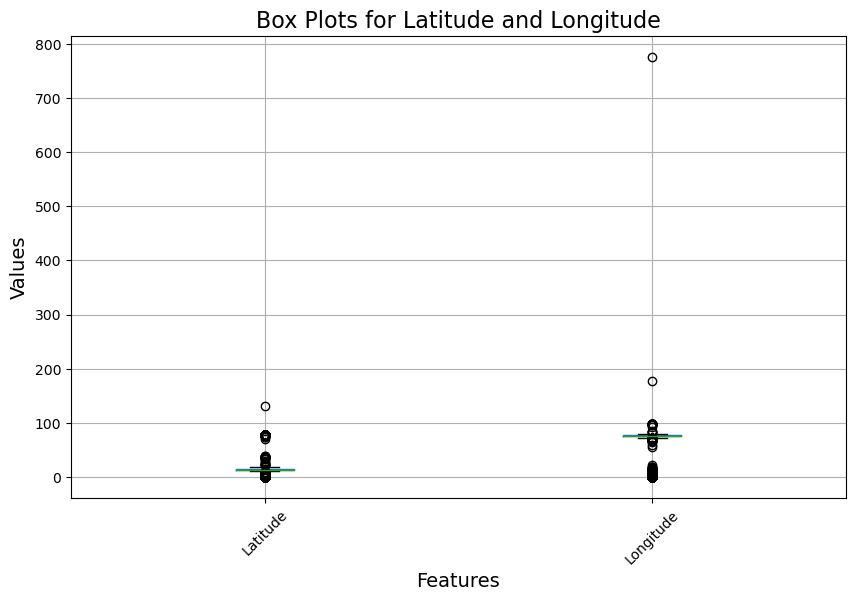

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
numerical_df.boxplot(column=['Latitude', 'Longitude'])
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Box Plots for Latitude and Longitude', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Spread of Accidents Location Wise

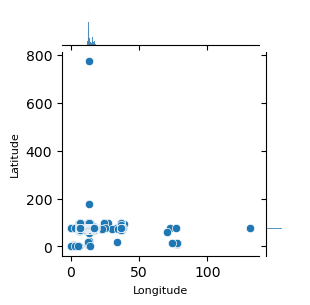

In [22]:
sns.jointplot(x=filtered_df.Latitude.values,y=filtered_df.Longitude.values,height=3)
plt.ylabel('Latitude', fontsize=8)
plt.xlabel('Longitude', fontsize=8)
plt.show()

In [23]:
# sns.jointplot(
#     data=filtered_df,
#     x="Longitude", y="Latitude", hue="Severity",
#     kind="kde"
# )

# Number of Accidents Analysis

## Year Wise Analysis

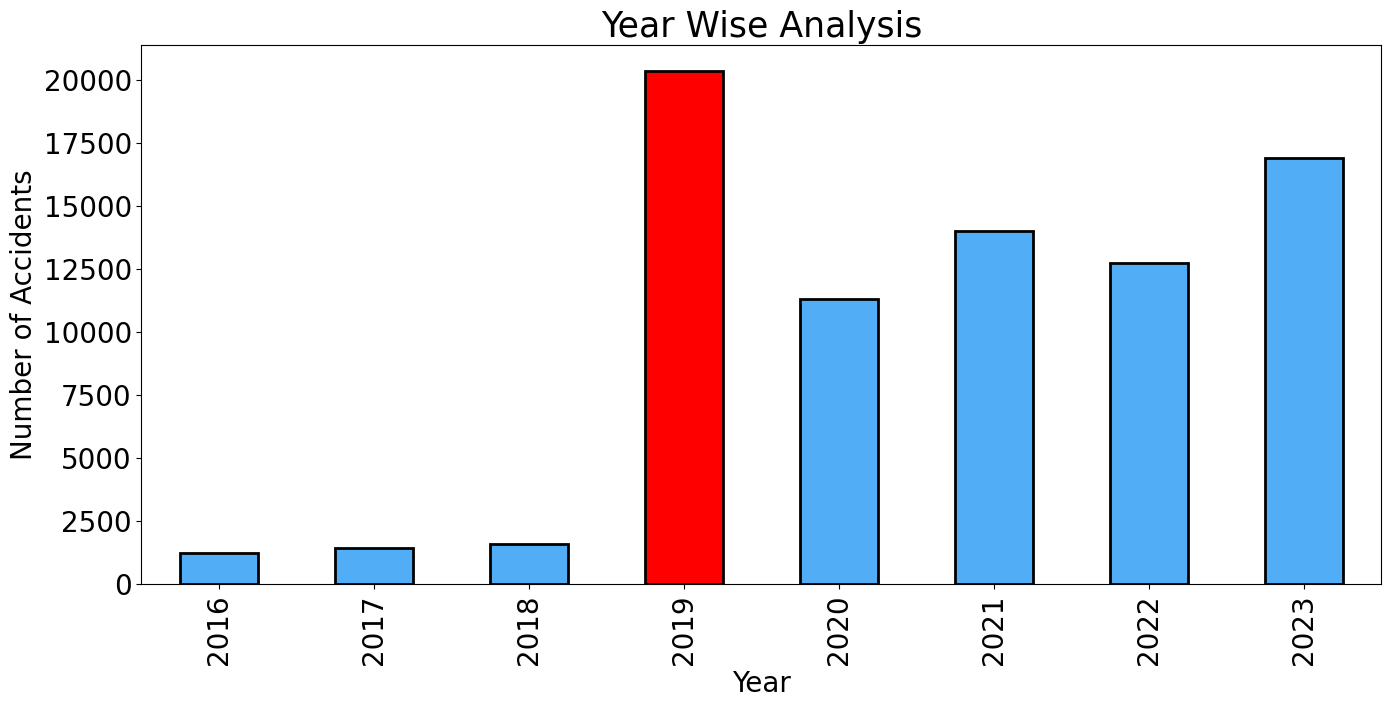

In [24]:
df_sortedBy_year = filtered_df['Year'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_year = df_sortedBy_year.max()

# Assigning colors
colors_year = ['#52adf7' if x != max_height_year else 'red' for x in df_sortedBy_year]

# Plotting for 'Year'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_year.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_year)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Year Wise Analysis', fontsize=25)
plt.show()

## District Wise Analysis 

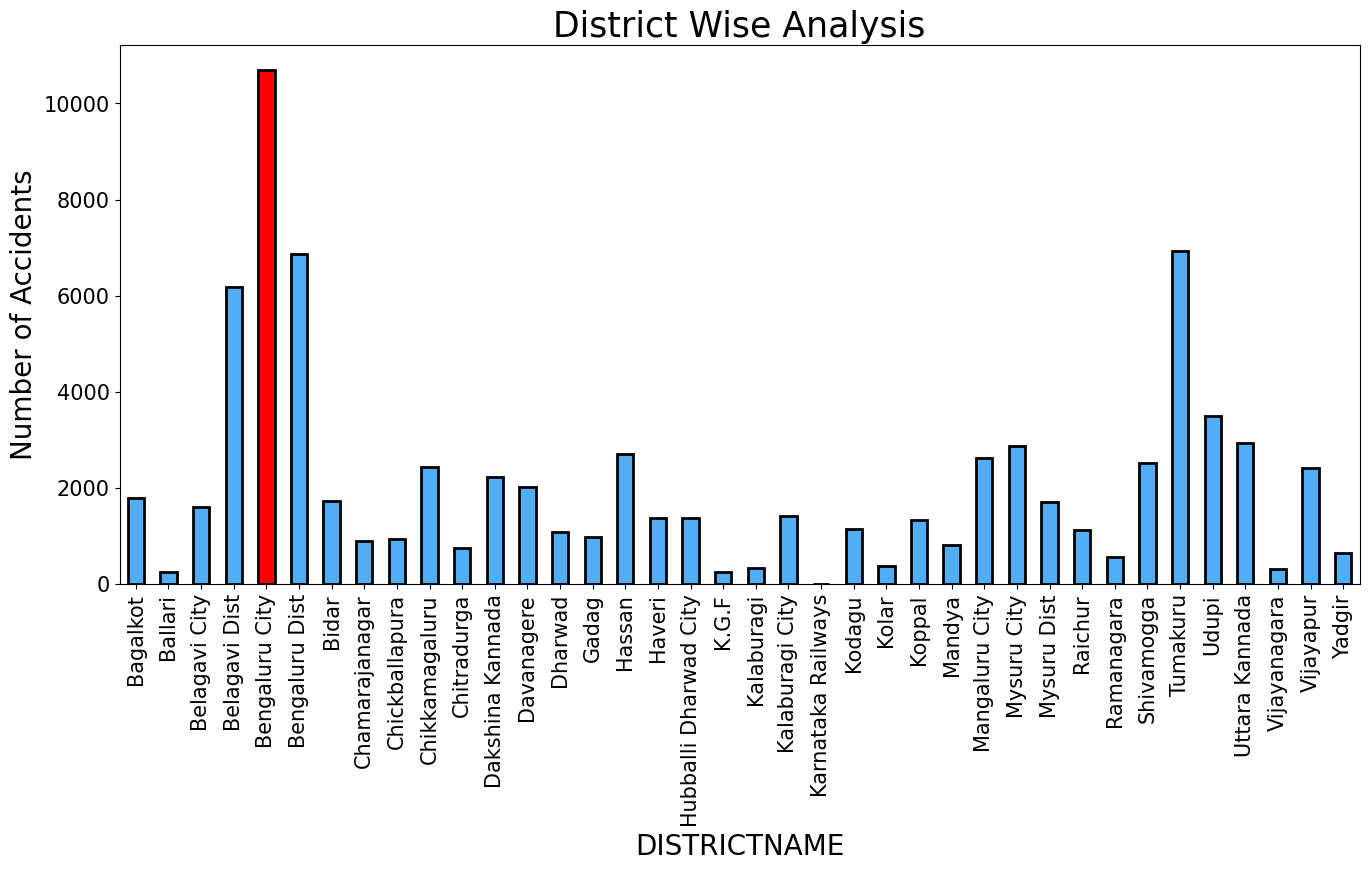

In [25]:
df_sortedBy_district = filtered_df['DISTRICTNAME'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_district = df_sortedBy_district.max()

# Assigning colors
colors_district = ['#52adf7' if x != max_height_district else 'red' for x in df_sortedBy_district]

# Plotting for 'DISTRICTNAME'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_district.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_district)
plt.xlabel('DISTRICTNAME', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('District Wise Analysis', fontsize=25)
plt.show()

## Unit Wise

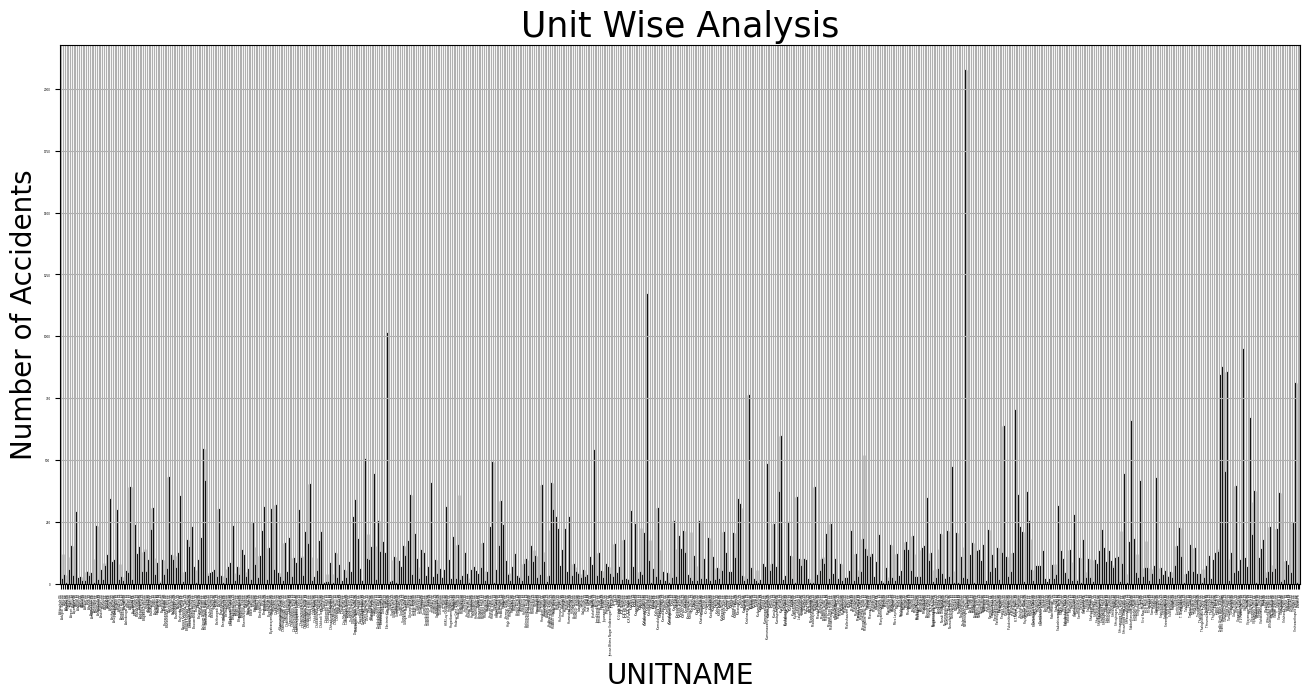

In [26]:
fig, ax=plt.subplots(figsize=(16,7))
filtered_df['UNITNAME'].value_counts().sort_index(ascending=True).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('UNITNAME',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=2)
plt.title('Unit Wise Analysis',fontsize=25)
plt.grid()
plt.show()

## Involved Vehicle Count

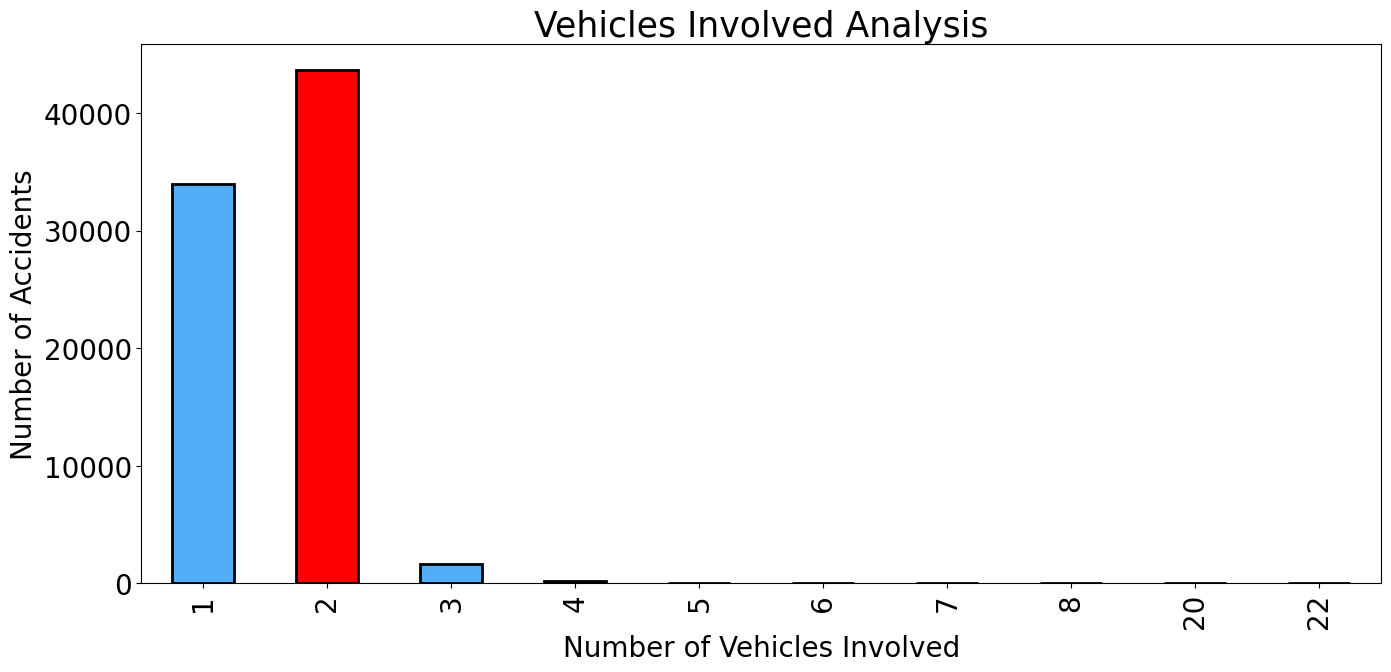

In [27]:
df_sortedBy_vehicle_involved = filtered_df['Noofvehicle_involved'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_vehicle_involved = df_sortedBy_vehicle_involved.max()

# Assigning colors
colors_vehicle_involved = ['#52adf7' if x != max_height_vehicle_involved else 'red' for x in df_sortedBy_vehicle_involved]

# Plotting for 'Noofvehicle_involved'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_vehicle_involved.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_vehicle_involved)
plt.xlabel('Number of Vehicles Involved', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Vehicles Involved Analysis', fontsize=25)
plt.show()

## Types of Roads

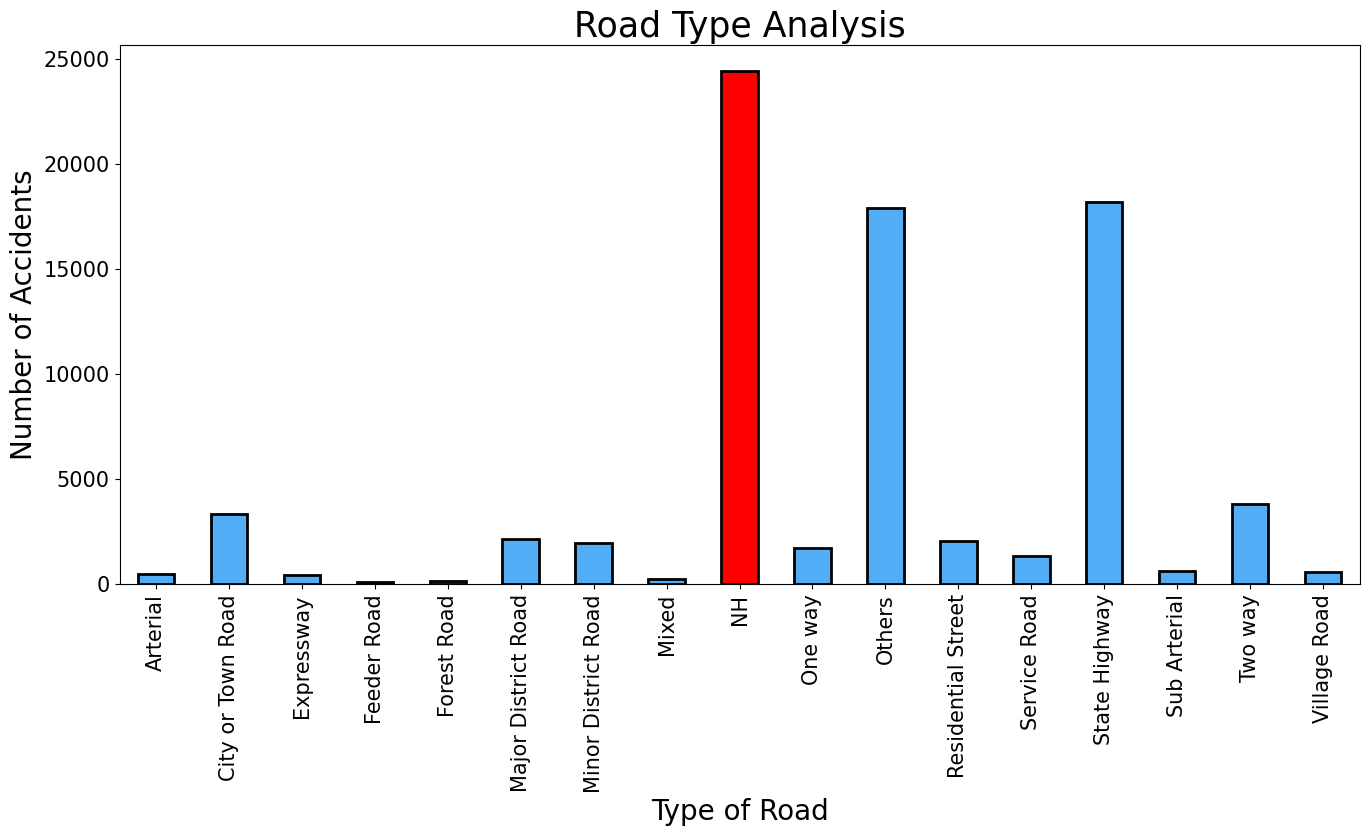

In [28]:
df_sortedBy_road_type = filtered_df['Road_Type'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_road_type = df_sortedBy_road_type.max()

# Assigning colors
colors_road_type = ['#52adf7' if x != max_height_road_type else 'red' for x in df_sortedBy_road_type]

# Plotting for 'Road_Type'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_road_type.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_road_type)
plt.xlabel('Type of Road', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Road Type Analysis', fontsize=25)
plt.show()

## Types of Weather

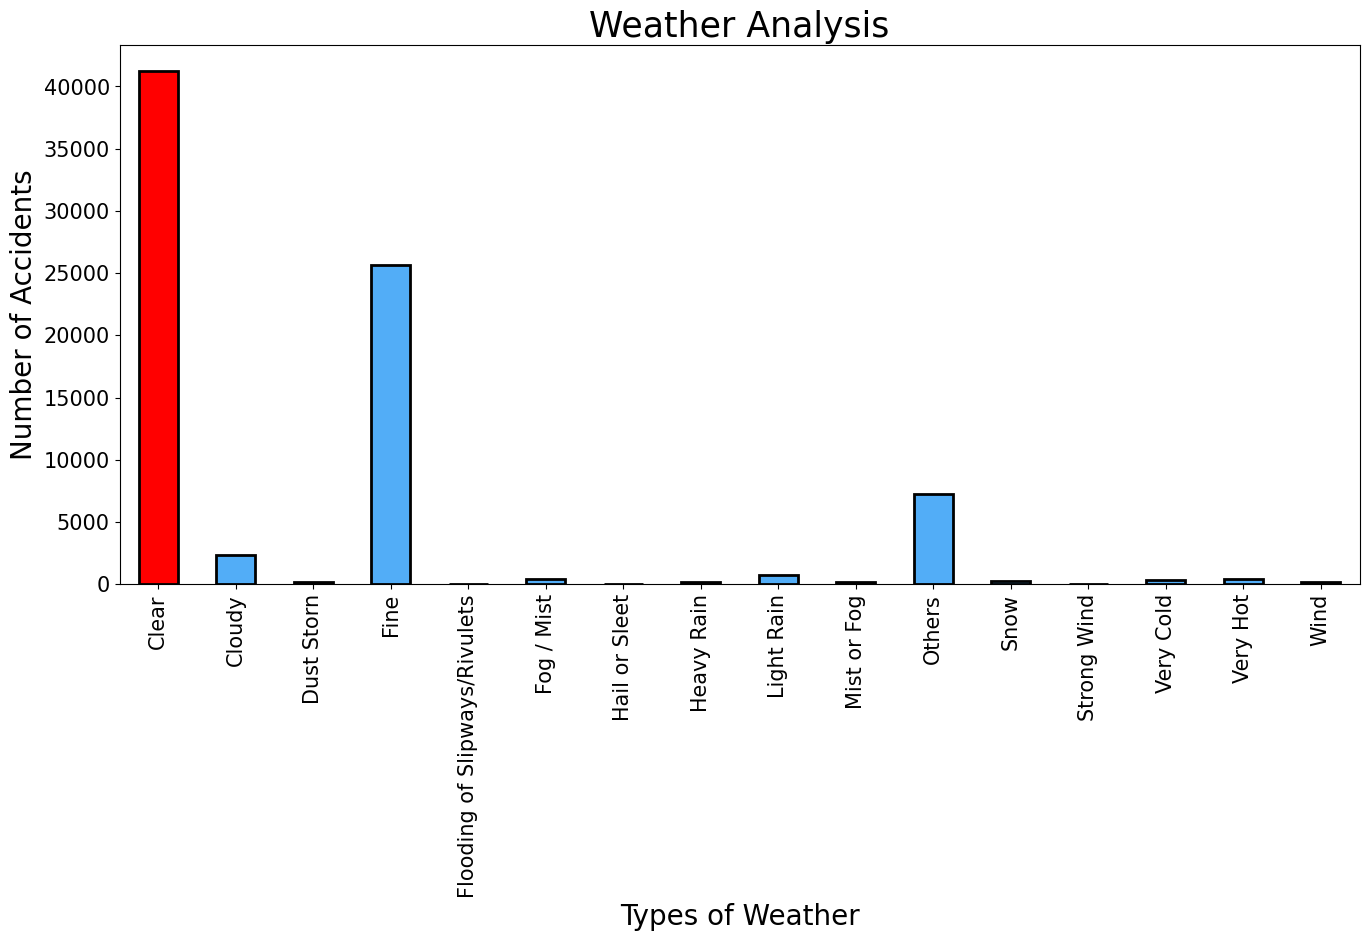

In [29]:
df_sortedBy_weather = filtered_df['Weather'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_weather = df_sortedBy_weather.max()

# Assigning colors
colors_weather = ['#52adf7' if x != max_height_weather else 'red' for x in df_sortedBy_weather]

# Plotting for 'Weather'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_weather.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_weather)
plt.xlabel('Types of Weather', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Weather Analysis', fontsize=25)
plt.show()

## Different Surface Conditions Wise Analysis

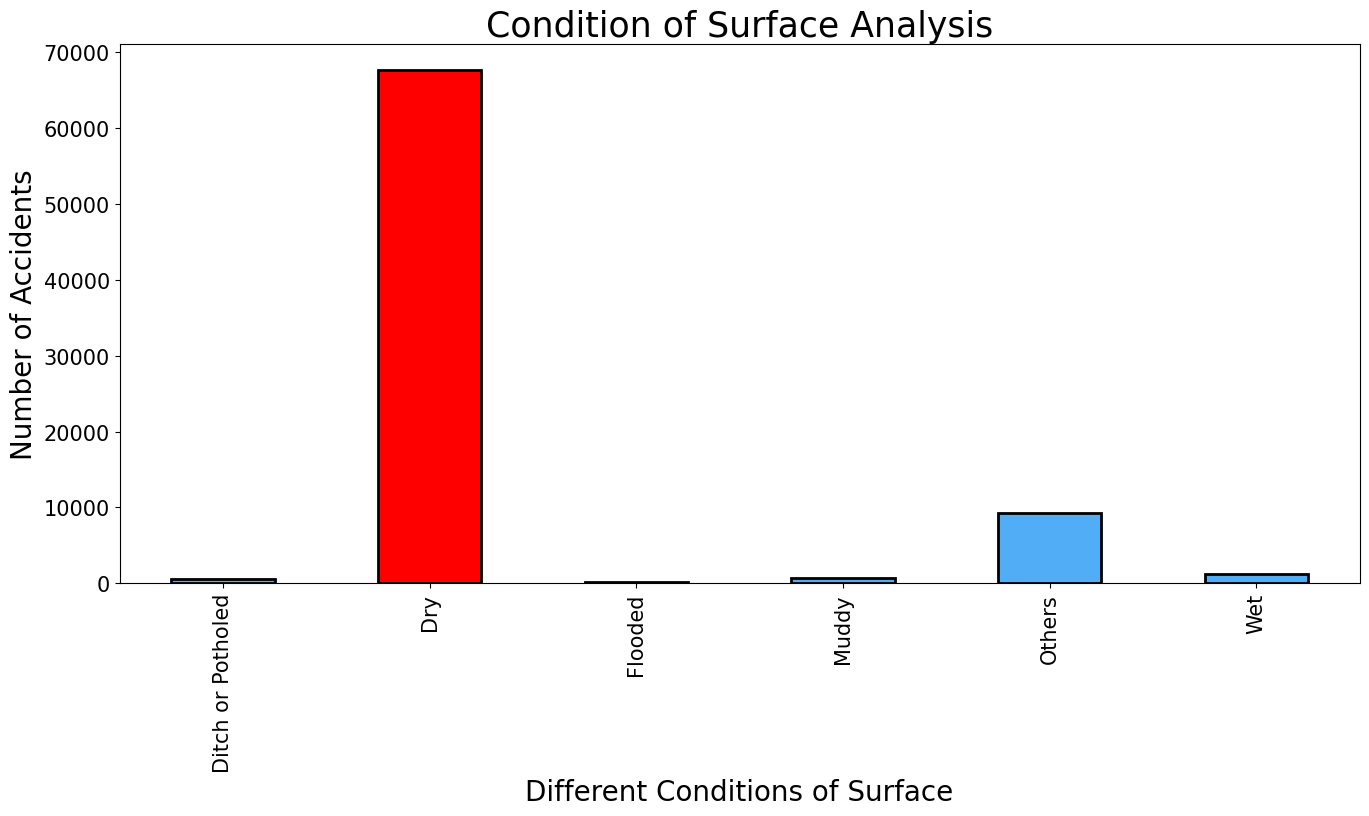

In [30]:
# Sorting and counting the values by 'Surface_Condition'
df_sortedBy_surface_condition = filtered_df['Surface_Condition'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_surface_condition = df_sortedBy_surface_condition.max()

# Assigning colors
colors_surface_condition = ['#52adf7' if x != max_height_surface_condition else 'red' for x in df_sortedBy_surface_condition]

# Plotting for 'Surface_Condition'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_surface_condition.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_surface_condition)
plt.xlabel('Different Conditions of Surface', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Condition of Surface Analysis', fontsize=25)
plt.show()

## Classification of Accident Analysis

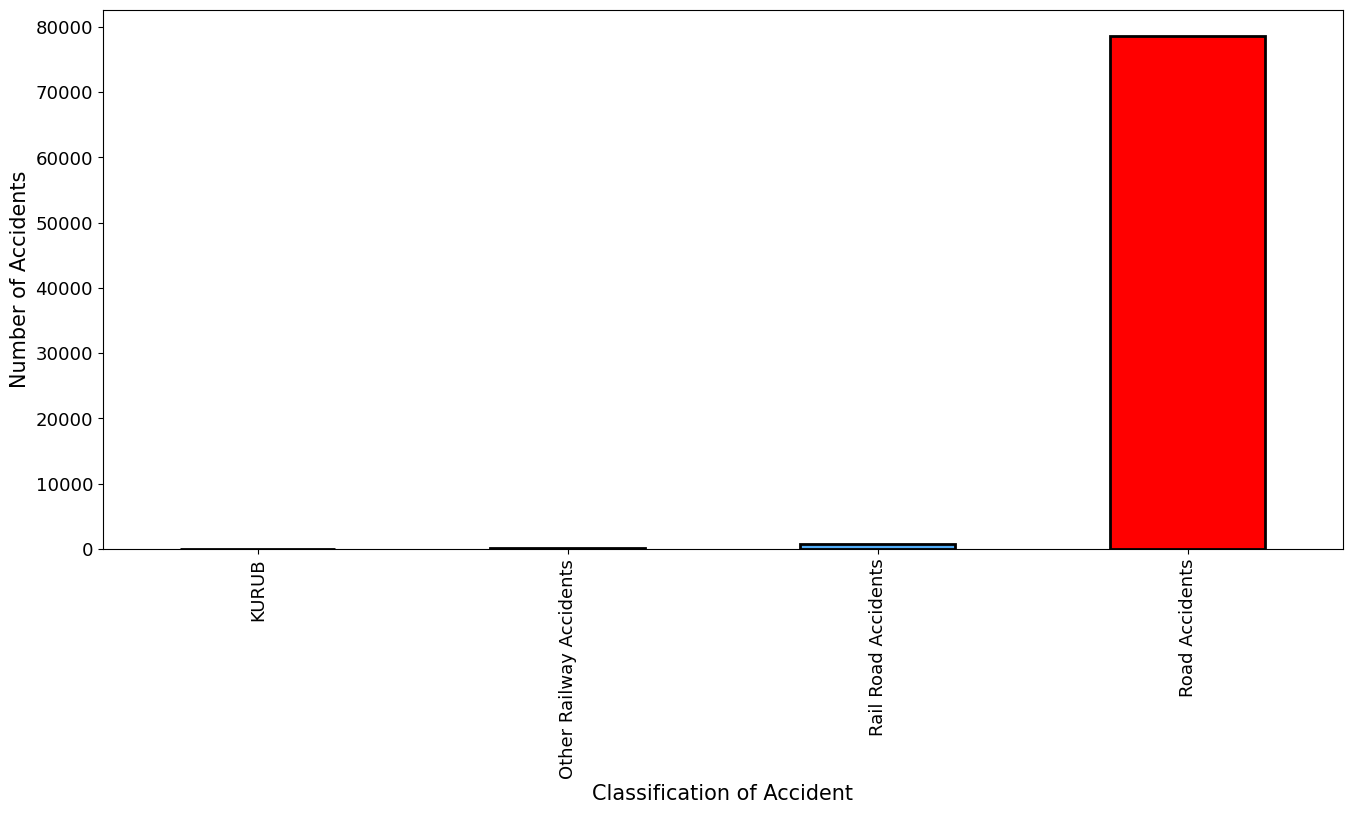

In [31]:
# Sorting and counting the values by 'Accident_Classification'
df_sortedBy_classification = filtered_df['Accident_Classification'].value_counts().sort_index(ascending=True)

# Get the maximum height of the bars
max_height_classification = df_sortedBy_classification.max()

# Assigning colors
colors_classification = ['#52adf7' if x != max_height_classification else 'red' for x in df_sortedBy_classification]

# Plotting for 'Accident_Classification'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_classification.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors_classification)
plt.xlabel('Classification of Accident', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
ax.tick_params(labelsize=13)
plt.show()


## Location Wise Analysis

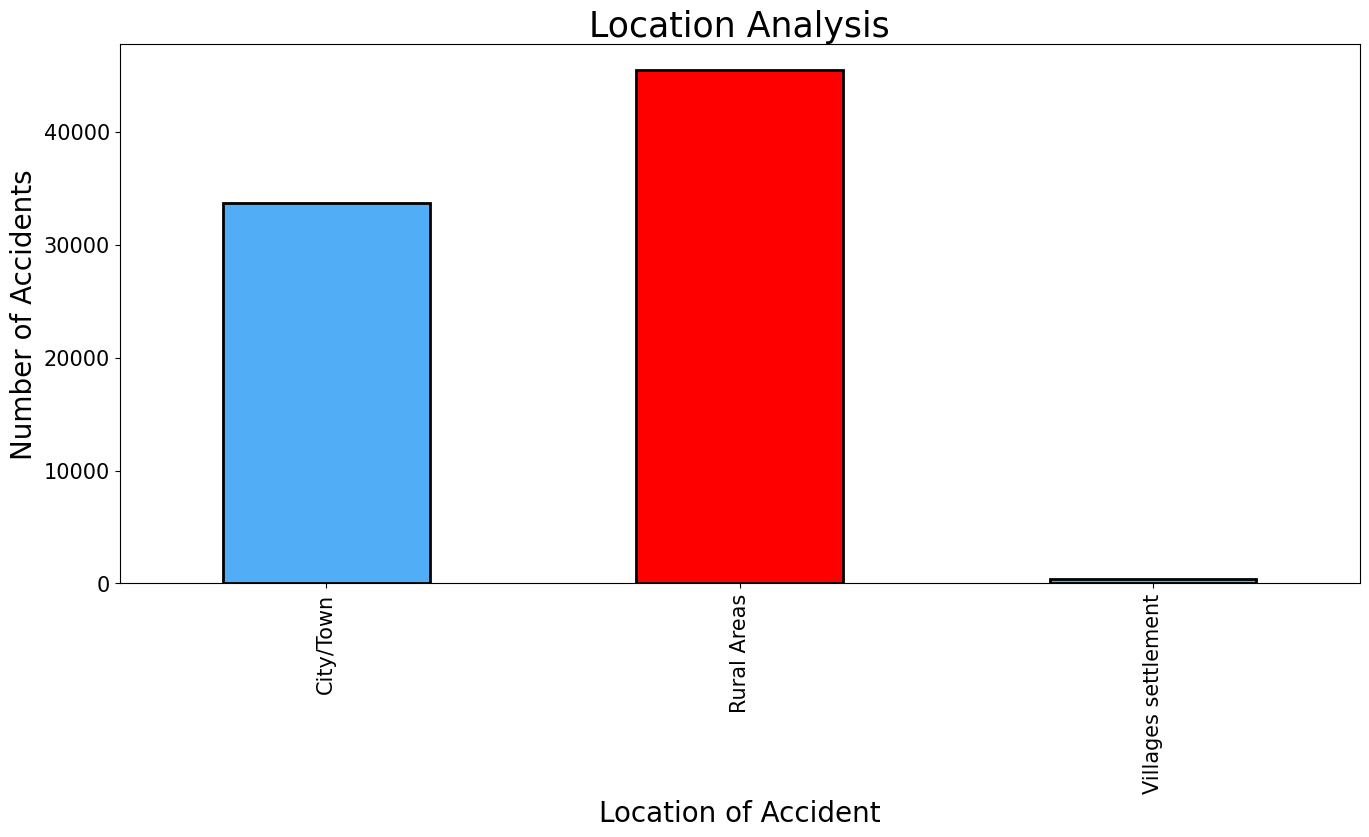

In [32]:
df_sortedBy_location = filtered_df['Accident_Location'].value_counts().sort_index(ascending=True)
max_height = filtered_df['Accident_Location'].value_counts().max()
colors = ['#52adf7' if x != max_height else 'red' for x in df_sortedBy_location]
# Plotting for 'Accident_Location'
fig, ax = plt.subplots(figsize=(16, 7))
df_sortedBy_location.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2,color = colors)
plt.xlabel('Location of Accident', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
plt.title('Location Analysis', fontsize=25)
ax.tick_params(labelsize=15)
plt.show()

## Sub-Location Wise Analysis

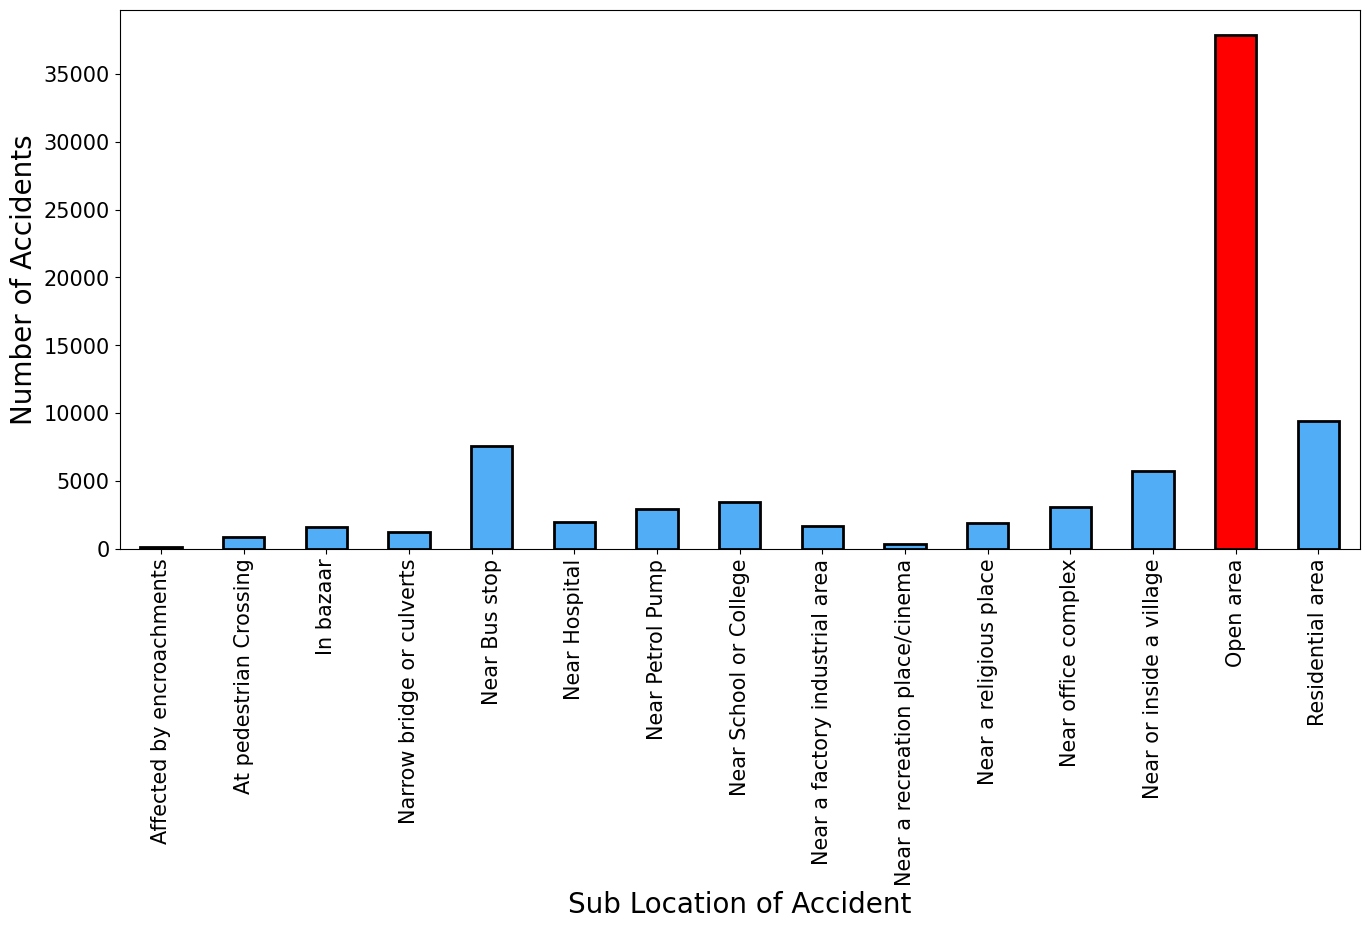

In [33]:
df_sortedBy_sublocation = filtered_df['Accident_SubLocation'].value_counts().sort_index(ascending=True)
# Get the maximum height of the bars
max_height = filtered_df['Accident_SubLocation'].value_counts().max()
colors = ['#52adf7' if x != max_height else 'red' for x in df_sortedBy_sublocation]
fig, ax=plt.subplots(figsize=(16,7))
df_sortedBy_sublocation.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2, color=colors)
plt.xlabel('Sub Location of Accident',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

# Correlation Analysis Among the Numerical Attributes

                      Crime_No      Year  Noofvehicle_involved  Latitude  \
Crime_No              1.000000  0.059221              0.003133  0.002742   
Year                  0.059221  1.000000              0.010818 -0.037043   
Noofvehicle_involved  0.003133  0.010818              1.000000 -0.032891   
Latitude              0.002742 -0.037043             -0.032891  1.000000   
Longitude             0.030553  0.135438             -0.004152 -0.041594   

                      Longitude  
Crime_No               0.030553  
Year                   0.135438  
Noofvehicle_involved  -0.004152  
Latitude              -0.041594  
Longitude              1.000000  


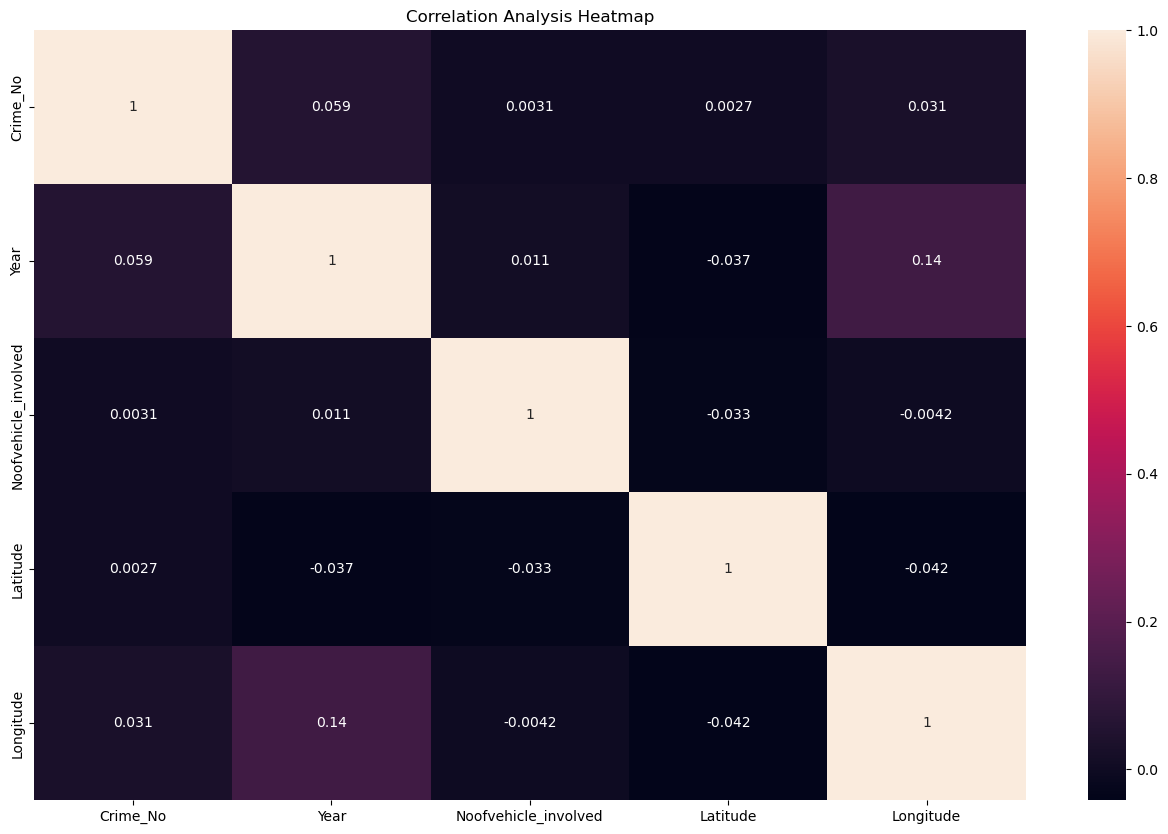

In [36]:
corr_matrix = filtered_df.corr(numeric_only="true")

print(corr_matrix)
# Analyze# Plotting the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True,)
plt.title('Correlation Analysis Heatmap')
#         plt.savefig('temp_chart.png')
plt.show()
plt.close()

# Accident Severity Analysis

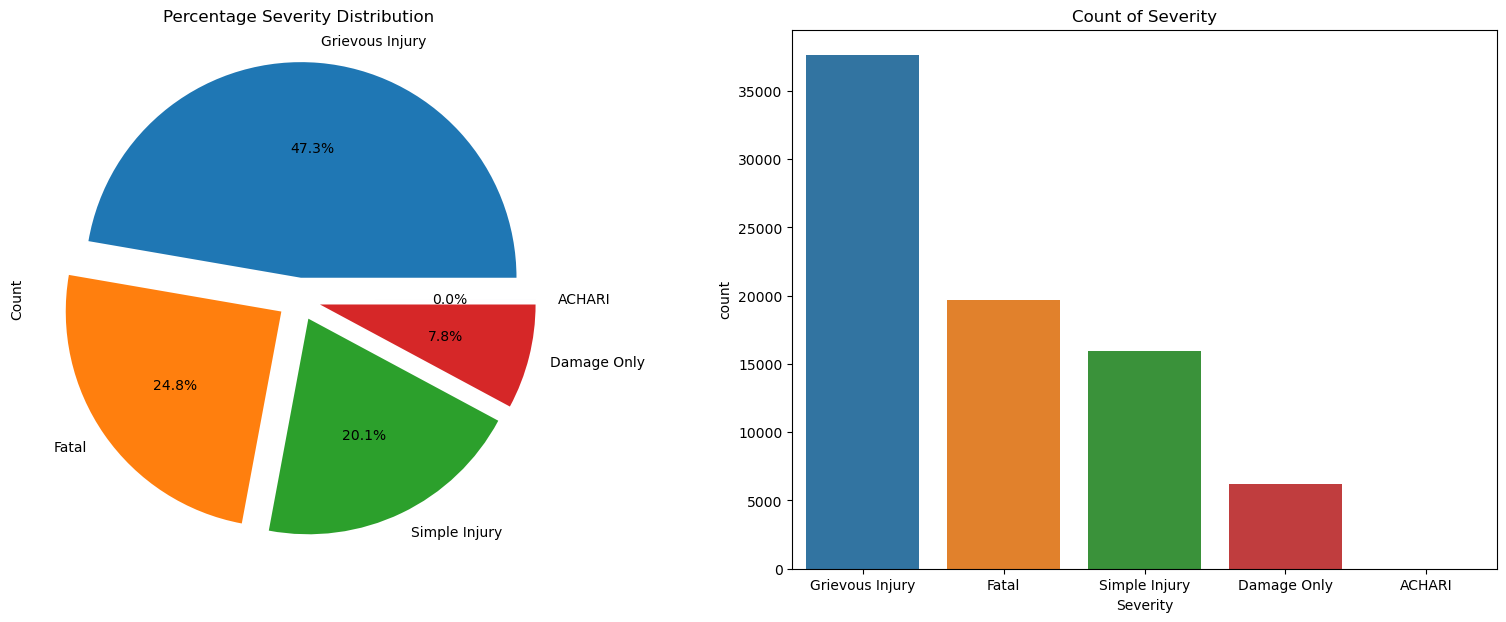

In [34]:
df_sortedBy_sublocation = filtered_df['Severity'].value_counts().sort_index(ascending=True)
# Get the maximum height of the bars
max_height = filtered_df['Severity'].value_counts().max()
colors = ['#52adf7' if x != max_height else 'red' for x in df_sortedBy_sublocation]
f,ax=plt.subplots(1,2,figsize=(20,7))
filtered_df['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
# sns.countplot('Severity',data=df,ax=ax[1],order=df['Accident_Severity'].value_counts().index)
sns.countplot(x='Severity', data=filtered_df, ax=ax[1], order=filtered_df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

In [35]:
# sns.catplot(data=filtered_df, x="Year", y="Severity", hue="Weather", kind="swarm")

# Severity Analysis 

## Over the years

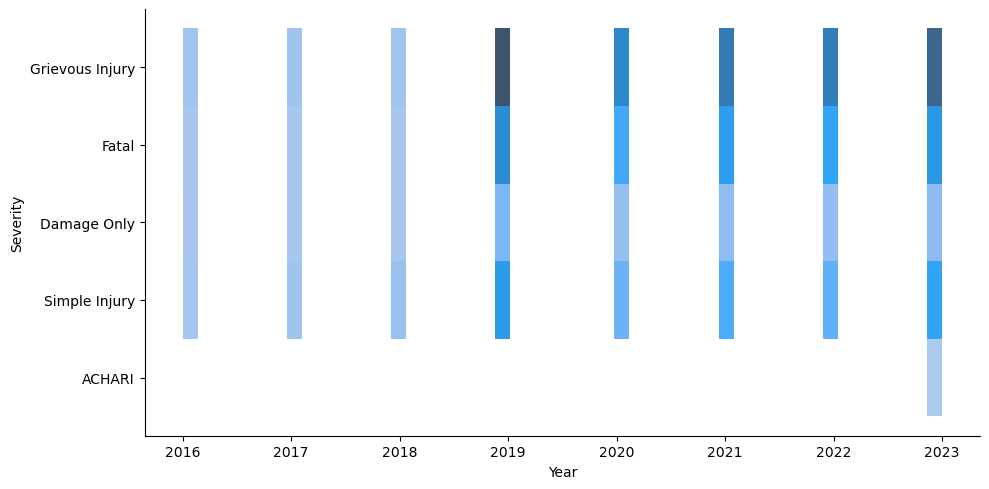

In [37]:
sns.displot(filtered_df, x="Year", y="Severity",height=5,aspect=2)

## Location Wise Analsysis

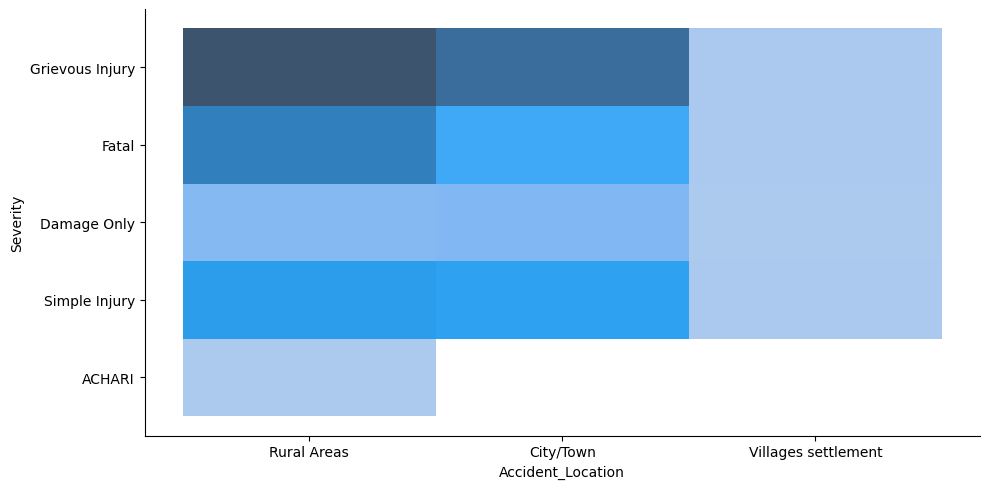

In [38]:
sns.displot(filtered_df, x="Accident_Location", y="Severity",height=5,aspect=2)

## District Wise Analsysis

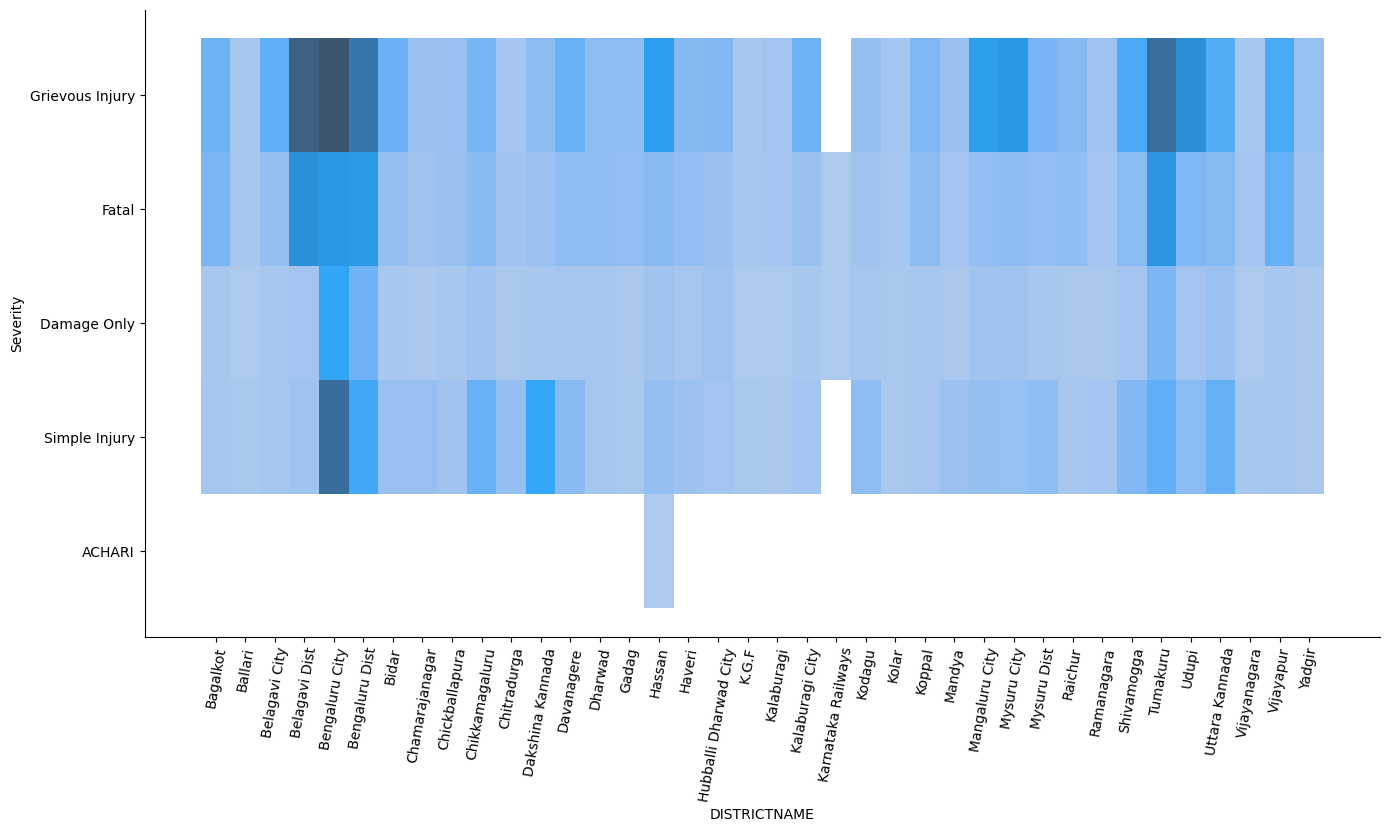

In [39]:
sns.displot(filtered_df, x="DISTRICTNAME", y="Severity",height=7, aspect=2)
plt.xticks(rotation=80)
plt.show()

## Main Cause of Accident Analysis

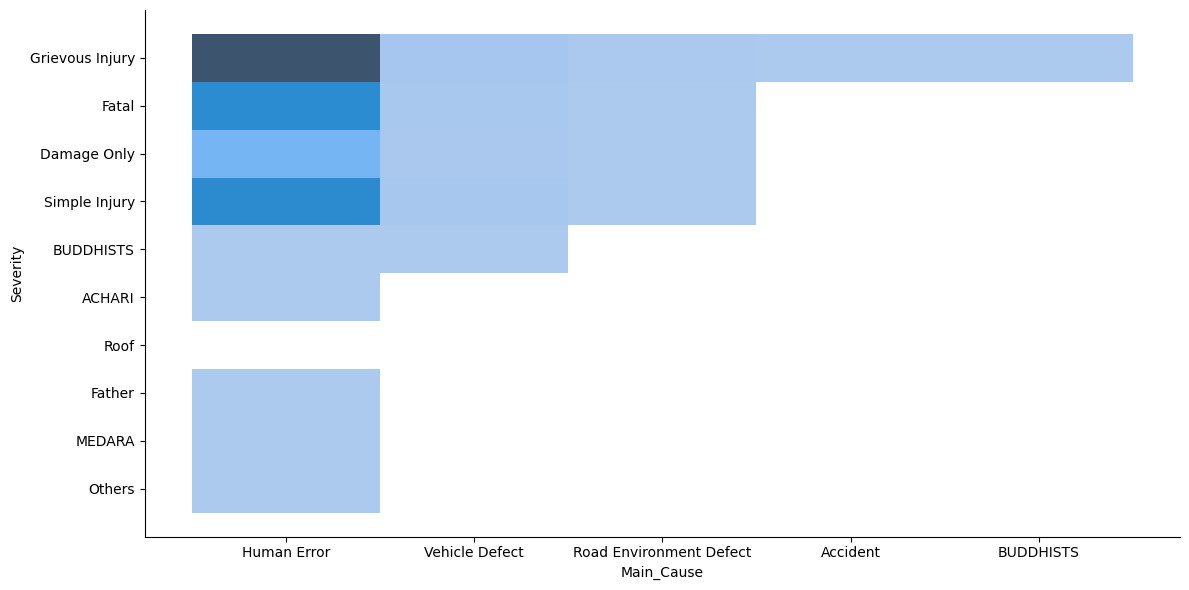

In [40]:
sns.displot(df, x="Main_Cause", y="Severity",height=6, aspect=2)
# plt.xticks(rotation=90)
plt.show()

## Classification of Accident Analysis

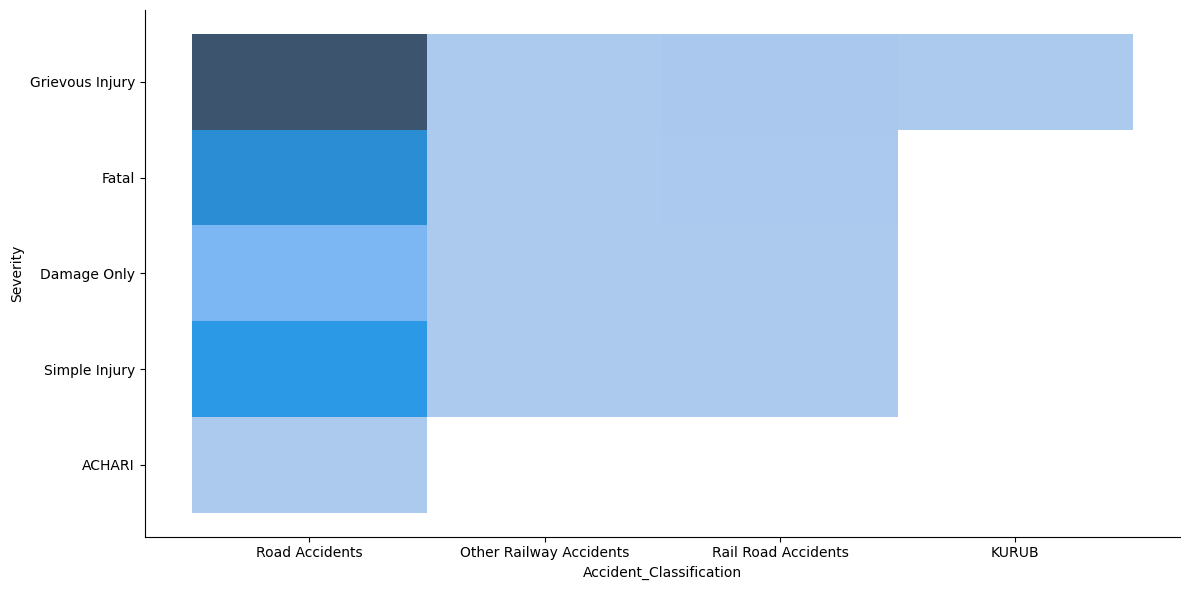

In [41]:
sns.displot(filtered_df, x="Accident_Classification", y="Severity",height=6, aspect=2)
# plt.xticks(rotation=90)
plt.show()

## Road Type Analysis

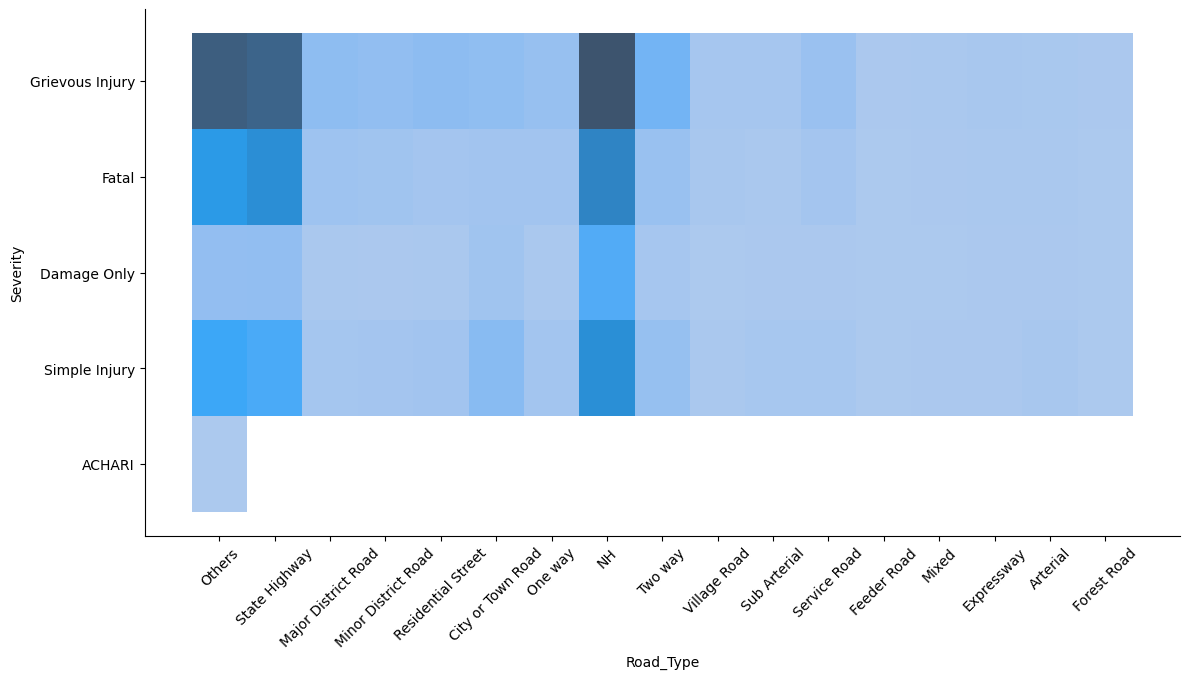

In [42]:
sns.displot(filtered_df, x="Road_Type", y="Severity",height=6, aspect=2)
# 
plt.xticks(rotation=45)
plt.show()

## Weather Analysis

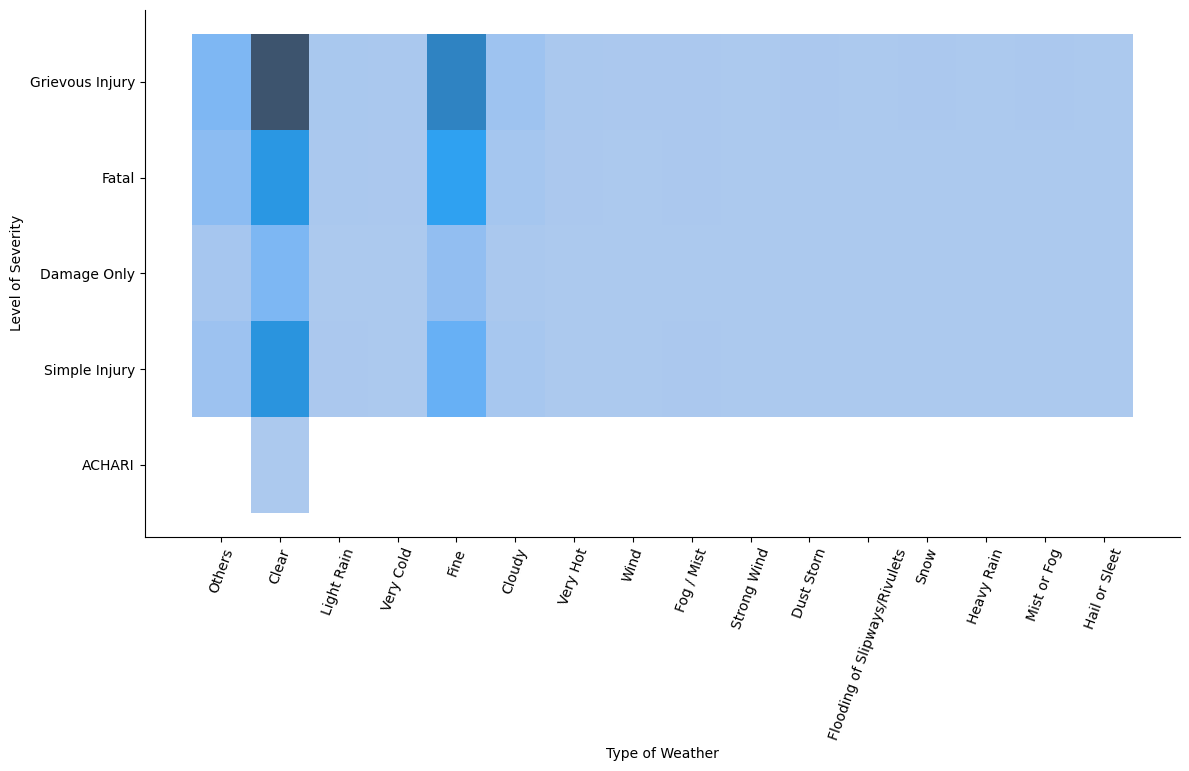

In [43]:
sns.displot(filtered_df, x="Weather", y="Severity",height=6, aspect=2).set_axis_labels("Type of Weather", "Level of Severity")
plt.xticks(rotation=70)
plt.show()

## Type of the SurfaceAnalysis

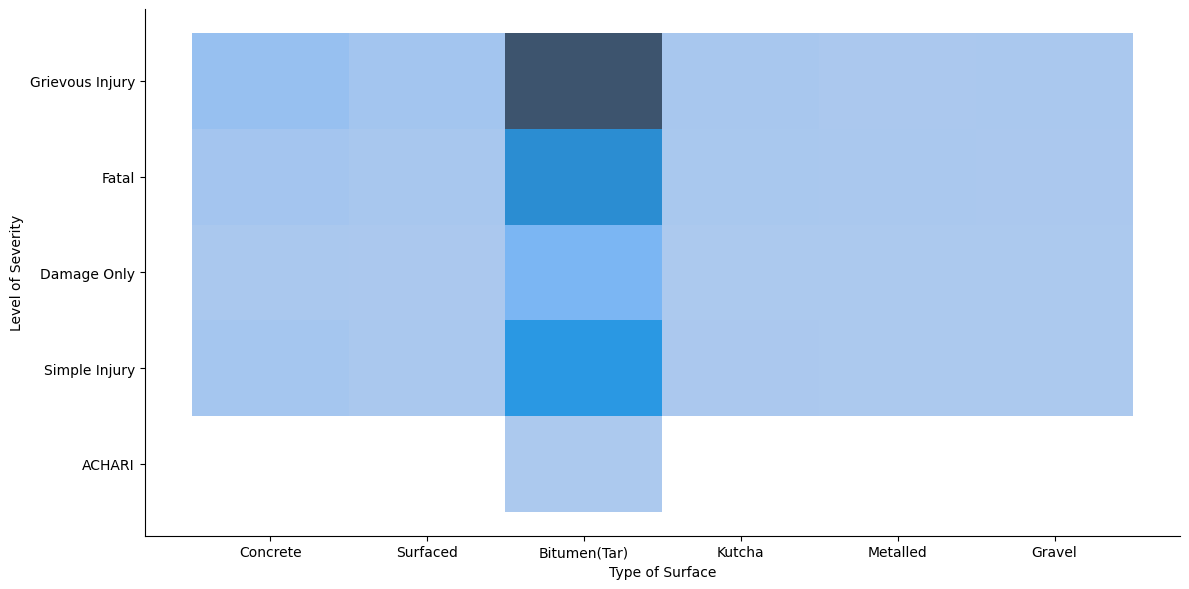

In [44]:
sns.displot(filtered_df, x="Surface_Type", y="Severity",height=6, aspect=2).set_axis_labels("Type of Surface", "Level of Severity")
# plt.xticks(rotation=70)
plt.show()

# Area Location and Sub-Location Analysis

## Over the years

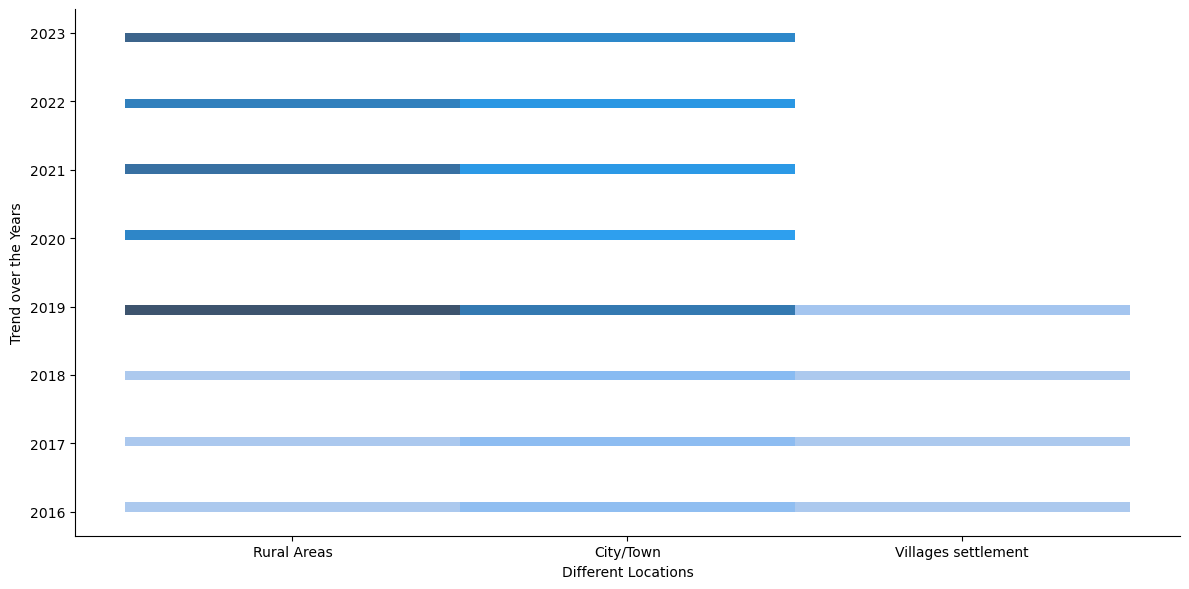

In [45]:
sns.displot(filtered_df, x="Accident_Location", y="Year",height=6, aspect=2).set_axis_labels("Different Locations", "Trend over the Years")
# plt.xticks(rotation=70)
plt.show()

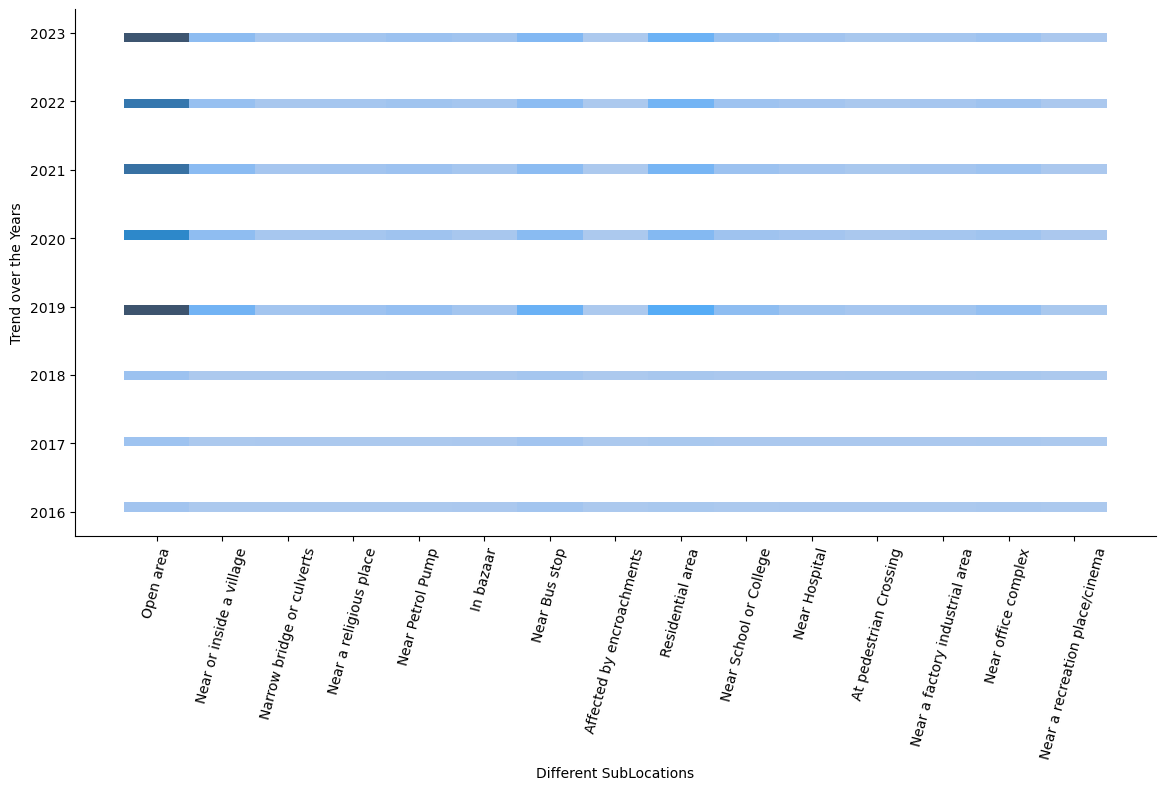

In [46]:
sns.displot(filtered_df, x="Accident_SubLocation", y="Year",height=6, aspect=2).set_axis_labels("Different SubLocations", "Trend over the Years")
plt.xticks(rotation=75)
plt.show()

## Weather Analysis

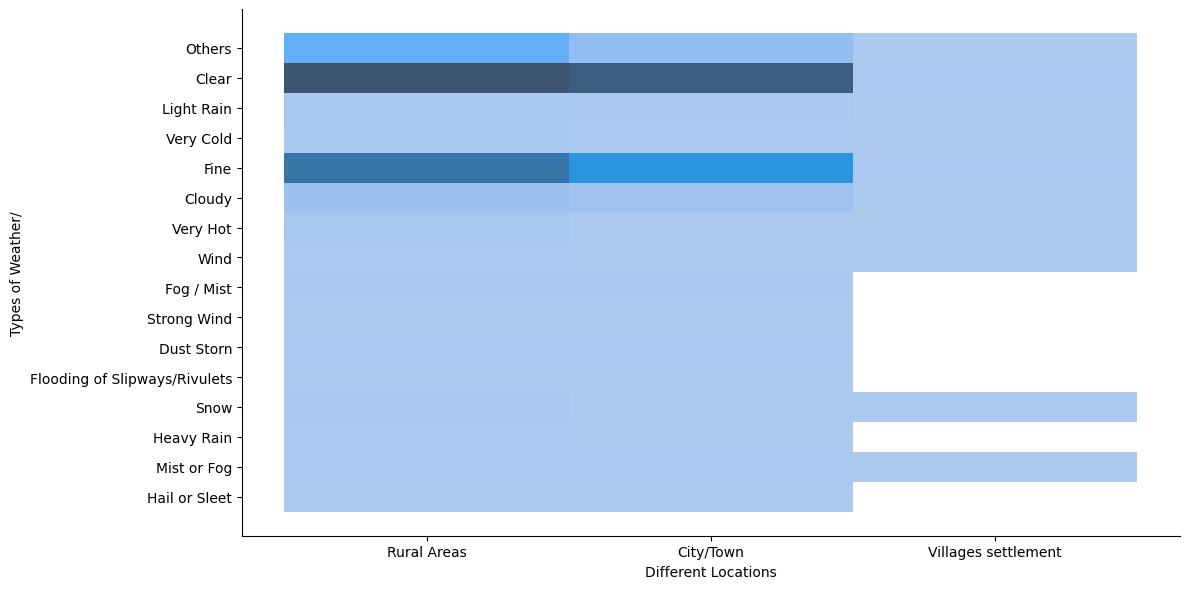

In [47]:
sns.displot(filtered_df, x="Accident_Location", y="Weather",height=6, aspect=2).set_axis_labels("Different Locations", "Types of Weather/")
# plt.xticks(rotation=70)
plt.show()

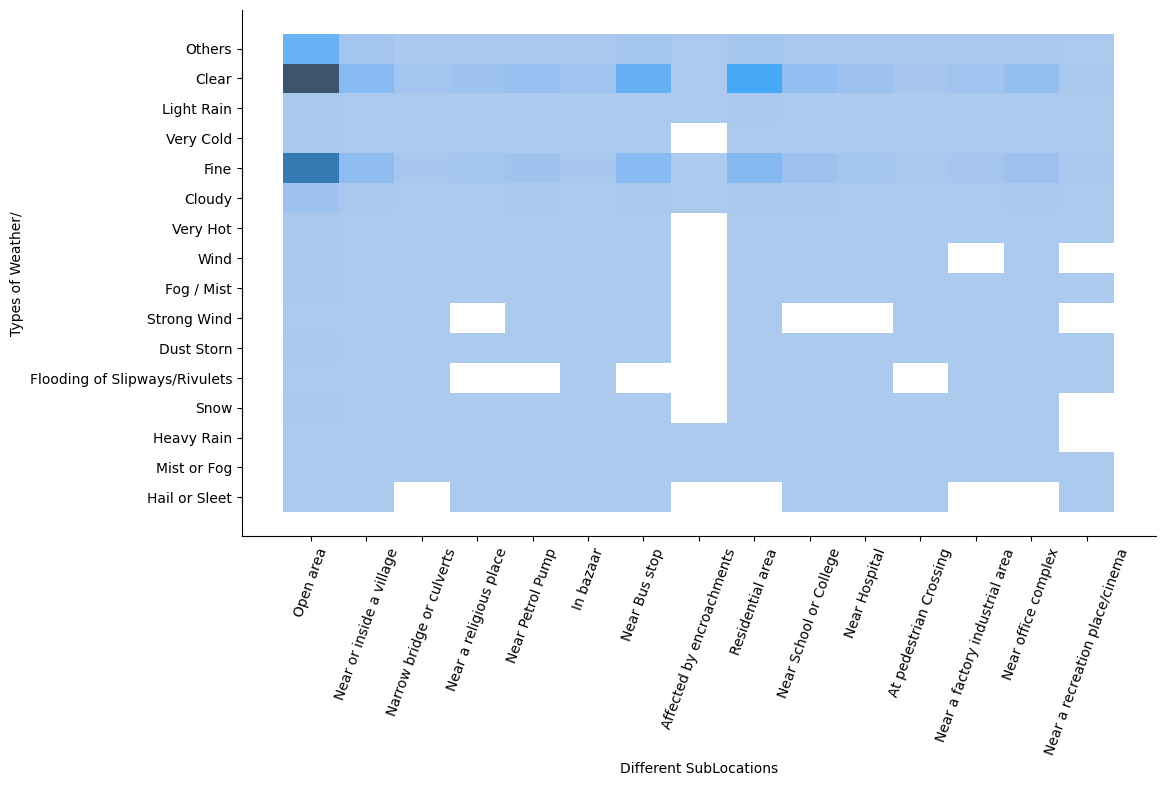

In [48]:
sns.displot(filtered_df, x="Accident_SubLocation", y="Weather",height=6, aspect=2).set_axis_labels("Different SubLocations", "Types of Weather/")
plt.xticks(rotation=70)
plt.show()

## Severity Analysis

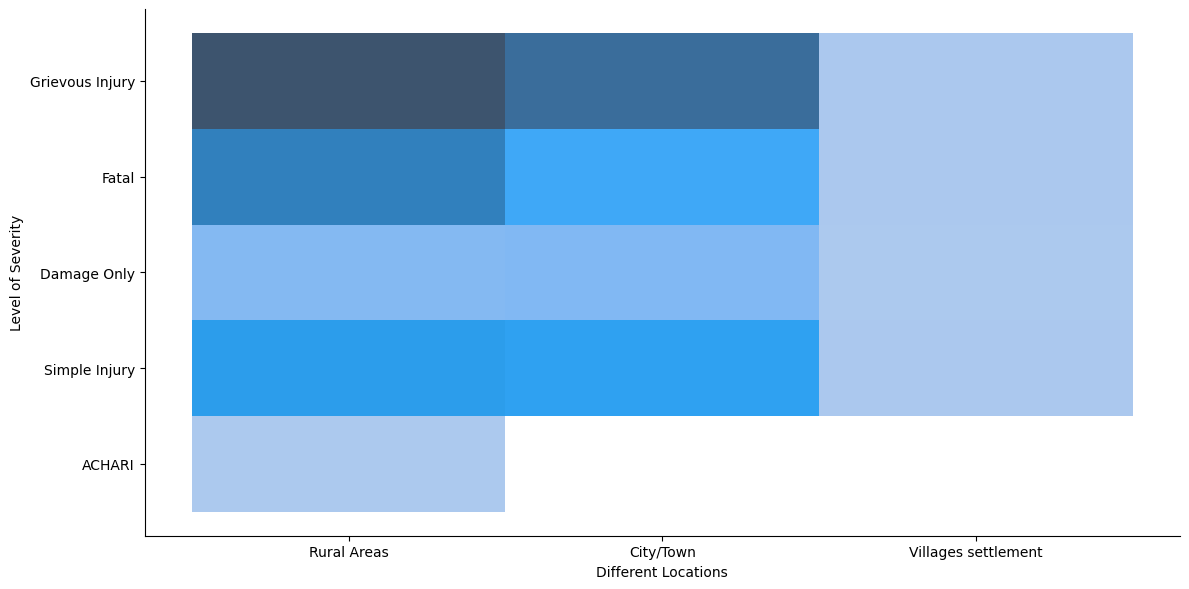

In [49]:
sns.displot(filtered_df, x="Accident_Location", y="Severity",height=6, aspect=2).set_axis_labels("Different Locations", "Level of Severity")
# plt.xticks(rotation=70)
plt.show()

# 'DISTRICTNAME', 'UNITNAME', 'Crime_No', 'Year', 'RI',
#        'Noofvehicle_involved', 'Accident_Classification', 'Accident_Location',
#        'Accident_SubLocation', 'Severity', 'Road_Type', 'Surface_Type',
#        'Surface_Condition', 'Weather', 'Accident_Road', 'Landmark_first',
#        'Distance_LandMark_First', 'Accident_Description', 'Latitude',
#        'Longitude'

## Number of Vehicles Involved

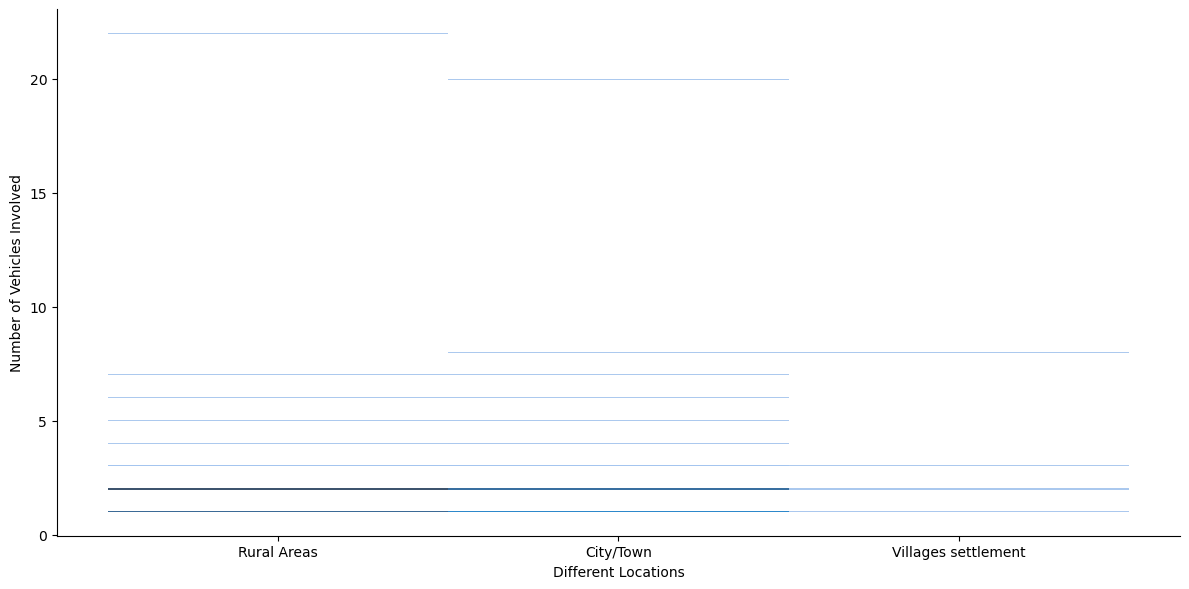

In [50]:
sns.displot(filtered_df, x="Accident_Location", y="Noofvehicle_involved",height=6, aspect=2).set_axis_labels("Different Locations", "Number of Vehicles Involved")
# plt.xticks(rotation=70)
plt.show()

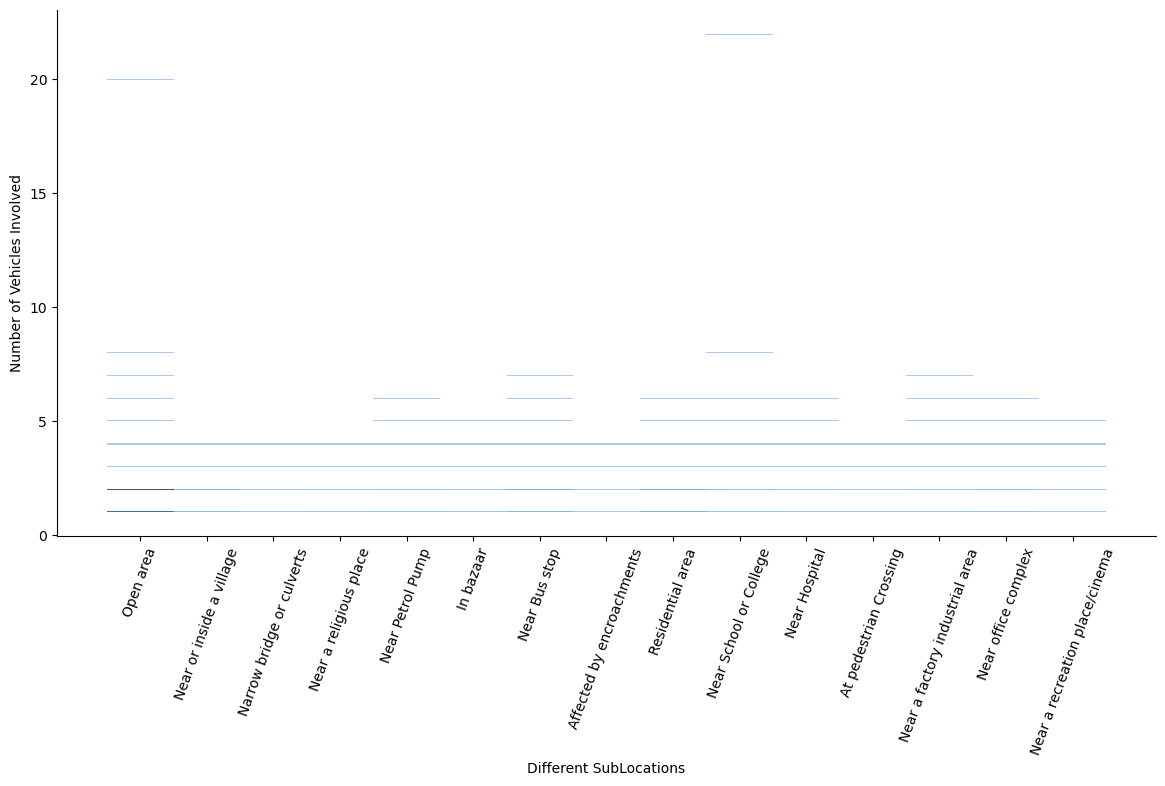

In [51]:
sns.displot(filtered_df, x="Accident_SubLocation", y="Noofvehicle_involved",height=6, aspect=2).set_axis_labels("Different SubLocations", "Number of Vehicles Involved")
plt.xticks(rotation=70)
plt.show()

## Classification of Accidents

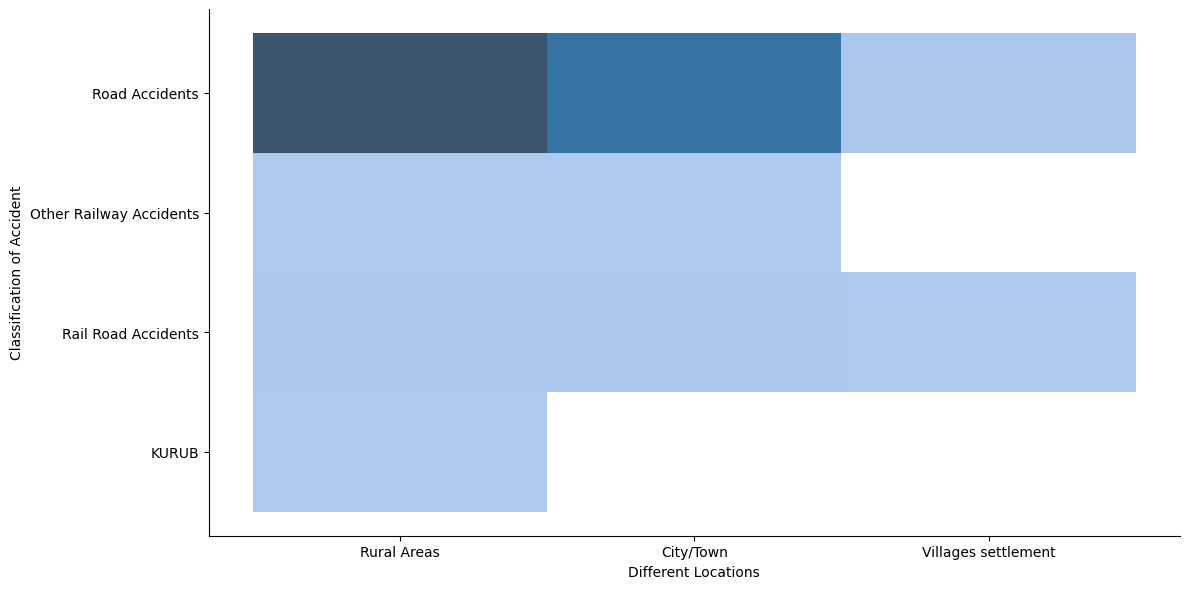

In [52]:
# 'DISTRICTNAME', 'UNITNAME', 'Crime_No', 'Year', 'RI',
#        'Noofvehicle_involved', 'Accident_Classification', 'Accident_Location',
#        'Accident_SubLocation', 'Severity', 'Road_Type', 'Surface_Type',
#        'Surface_Condition', 'Weather', 'Accident_Road', 'Landmark_first',
#        'Distance_LandMark_First', 'Accident_Description', 'Latitude',
#        'Longitude'
sns.displot(filtered_df, x="Accident_Location", y="Accident_Classification",height=6, aspect=2).set_axis_labels("Different Locations", "Classification of Accident")
# plt.xticks(rotation=70)
plt.show()

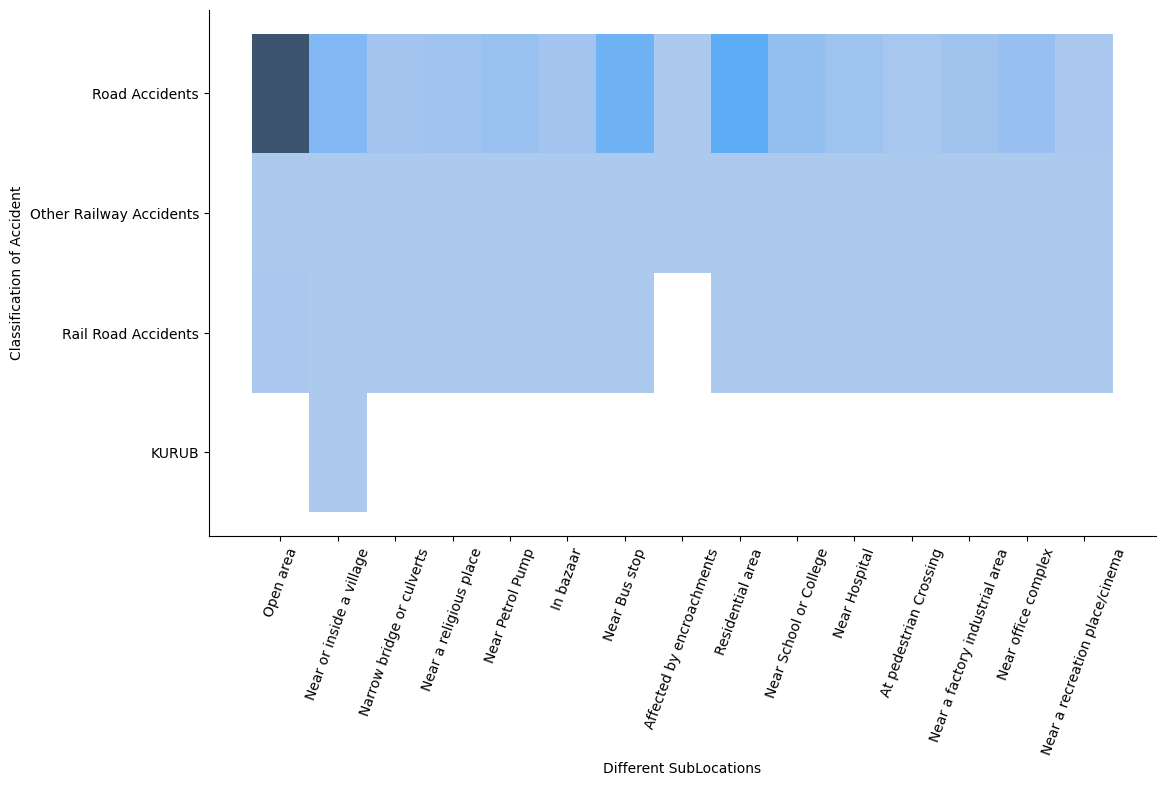

In [53]:
sns.displot(filtered_df, x="Accident_SubLocation", y="Accident_Classification",height=6, aspect=2).set_axis_labels("Different SubLocations", "Classification of Accident")
plt.xticks(rotation=70)
plt.show()

## District Wise

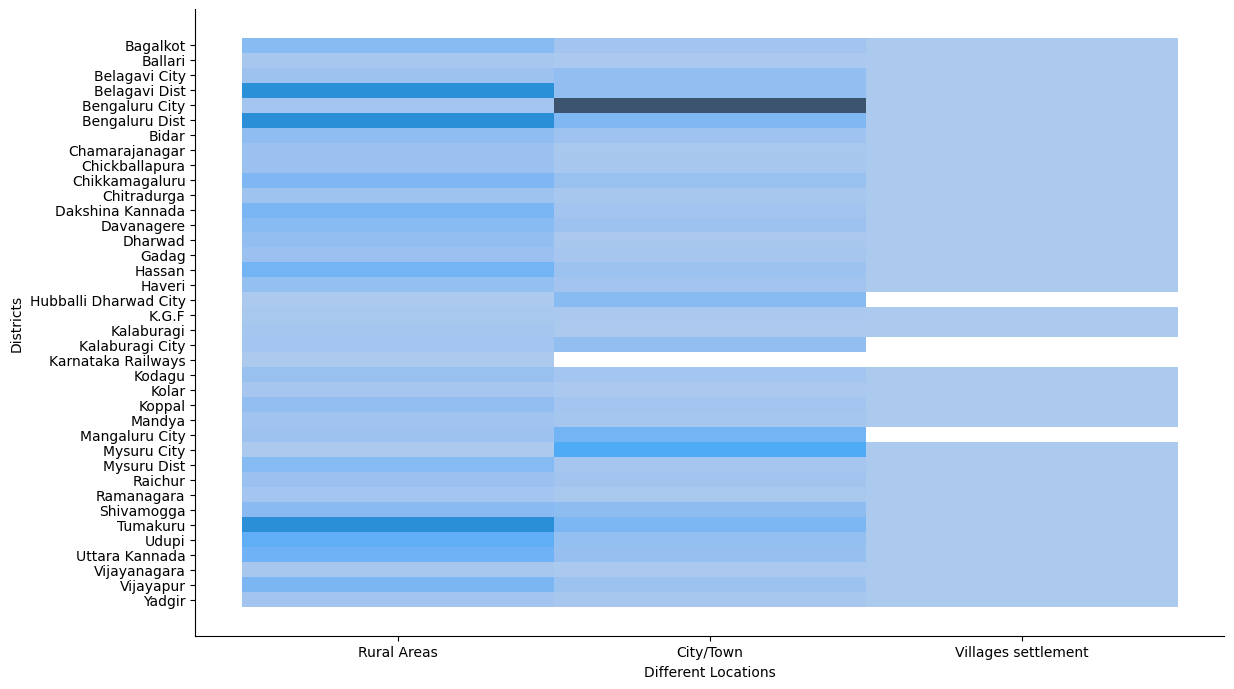

In [54]:
sns.displot(filtered_df, x="Accident_Location", y="DISTRICTNAME",height=7, aspect=16/9).set_axis_labels("Different Locations", "Districts")
# plt.xticks(rotation=70)
plt.show()

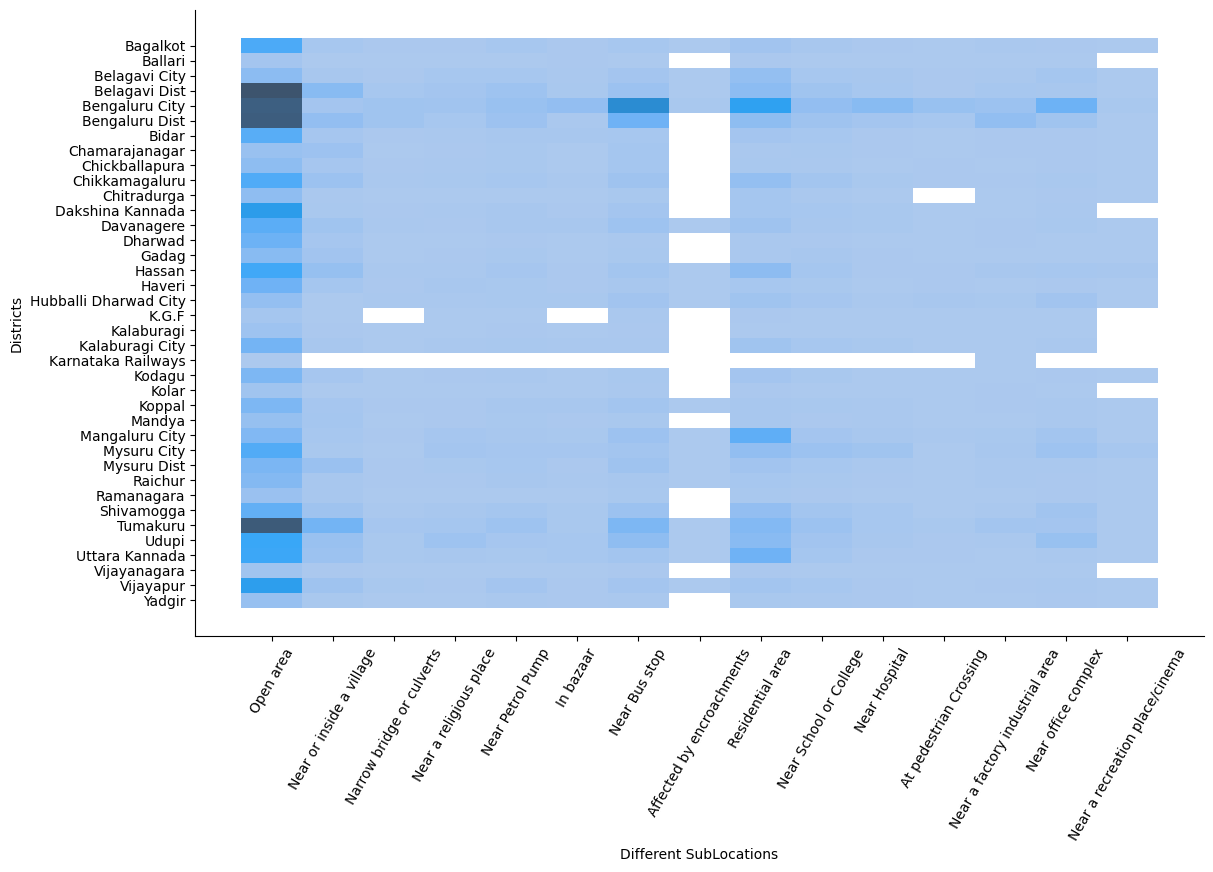

In [55]:
sns.displot(filtered_df, x="Accident_SubLocation", y="DISTRICTNAME",height=7, aspect=16/9).set_axis_labels("Different SubLocations", "Districts")
plt.xticks(rotation=60)
# plt.gcf().set_size_inches(15, 10)  # Set figure size
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)  # Adjust layout
# plt.savefig("side_by_side_plots.png",dpi=300)
# plt.savefig("side_by_side_plots.svg", format='svg')
plt.show()


## Road Classification Analysis

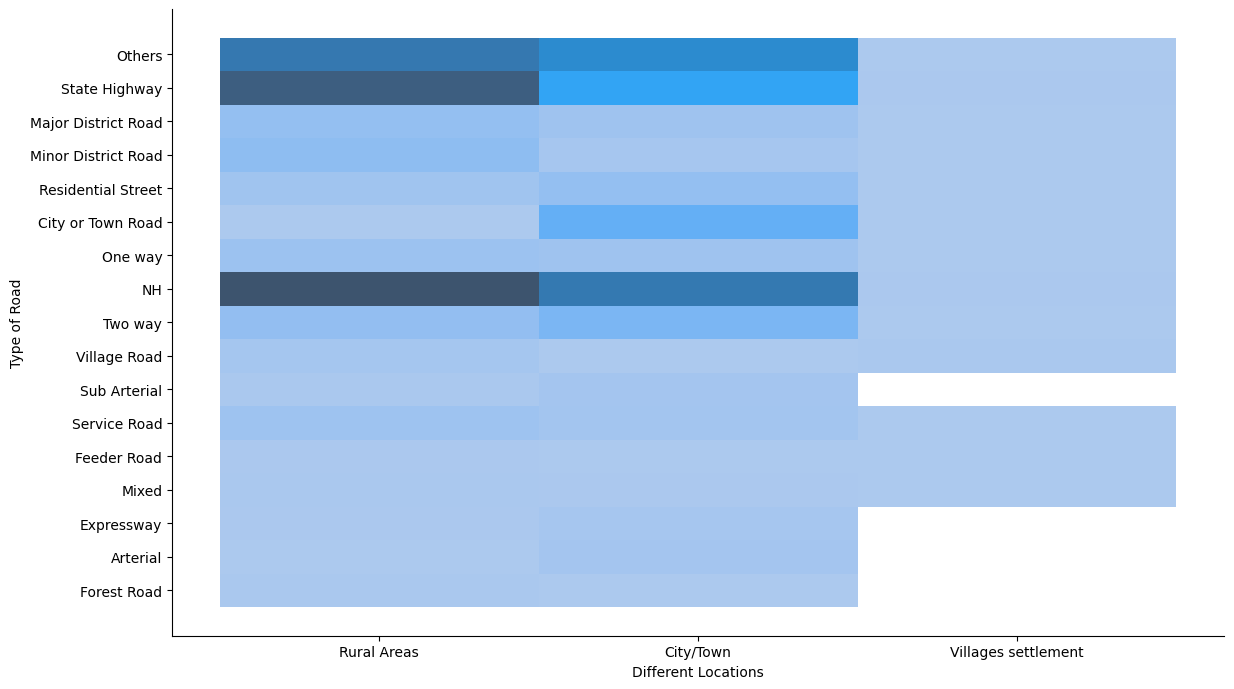

In [56]:
sns.displot(filtered_df, x="Accident_Location", y="Road_Type",height=7, aspect=16/9).set_axis_labels("Different Locations", "Type of Road")
# plt.xticks(rotation=70)
plt.show()

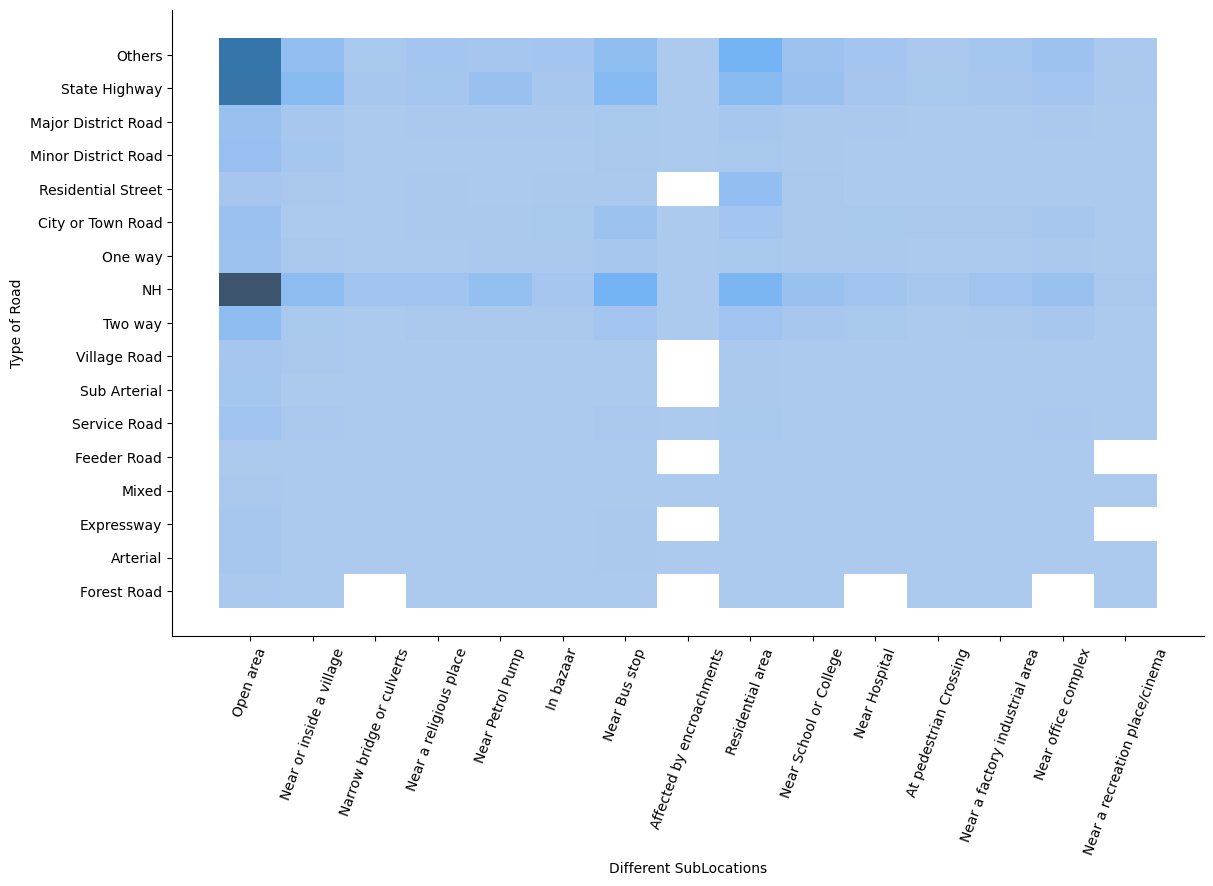

In [57]:
sns.displot(filtered_df, x="Accident_SubLocation", y="Road_Type",height=7, aspect=16/9).set_axis_labels("Different SubLocations", "Type of Road")
plt.xticks(rotation=70)
plt.show()

## Type of Surface

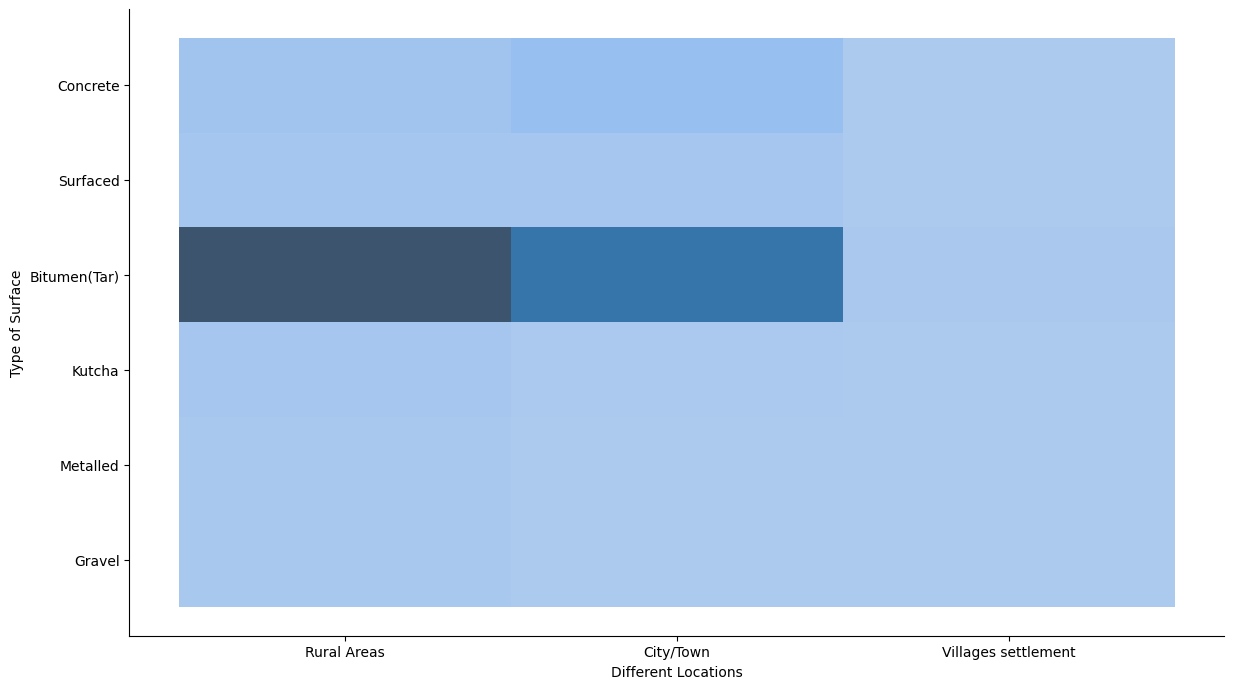

In [58]:
sns.displot(filtered_df, x="Accident_Location", y="Surface_Type",height=7, aspect=16/9).set_axis_labels("Different Locations", "Type of Surface")
# plt.xticks(rotation=70)
plt.show()

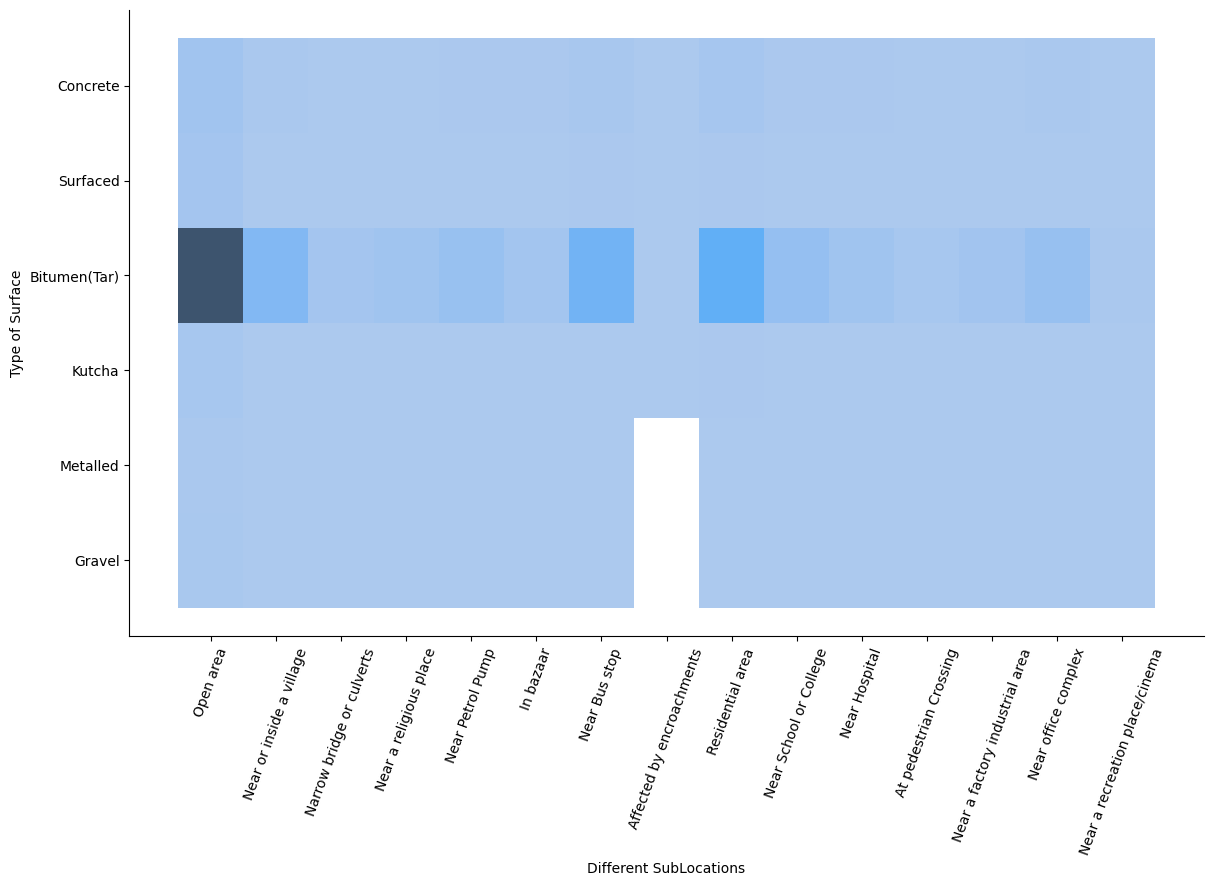

In [59]:
sns.displot(filtered_df, x="Accident_SubLocation", y="Surface_Type",height=7, aspect=16/9).set_axis_labels("Different SubLocations", "Type of Surface")
plt.xticks(rotation=70)
plt.show()

## District Analysis

In [60]:
# # Get unique districts
# districts = filtered_df['DISTRICTNAME'].unique()

# # Calculate the number of rows and columns for subplots
# num_rows = (len(districts) + 2) // 3  # Adjust the number of rows as needed
# num_cols = min(len(districts), 3)  # Maximum 3 columns

# # Set the size of the plot
# plt.figure(figsize=(15, 5 * num_rows))

# # Create countplots for each district
# for i, district in enumerate(districts):
#     plt.subplot(3, 3, i + 1)
#     sns.countplot(data=filtered_df[filtered_df['DISTRICTNAME'] == district], x='Accident_Road')
#     plt.title(f"Accident Roads in {district}")
#     plt.xlabel("Accident Road")
#     plt.ylabel("Frequency")
#     plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# # # Adjust layout
# # plt.tight_layout()

# # Show the plots
# plt.show()